In [1]:
## !pip install pycaret

In [2]:
import pandas as pd
import numpy as np

df = pd.read_csv("labels_oneHot_encoding.csv")

## MODEL CREATION FOR FEMALE_ANGRY

In [3]:
df.head()

,Unnamed: 0,pca_mfcc_1,pca_mfcc_2,pca_mfcc_3,pca_mfcc_4,pca_mfcc_5,pca_mfcc_6,pca_mfcc_7,pca_mfcc_8,pca_mfcc_9,...,female_neutral,female_sad,female_surprise,male_angry,male_disgust,male_fear,male_happy,male_neutral,male_sad,male_surprise
0,0,-109.834097,0.053196,-1.713443,-3.768810,-12.706864,1.144180,-6.869531,2.593850,-1.156389,...,0,0,0,0,0,0,0,1,0,0
1,1,-105.048512,1.461942,-1.111467,-1.051186,-12.977316,0.638045,-7.102971,1.234032,-0.479727,...,0,0,0,0,0,0,0,1,0,0
2,2,-103.732876,1.979006,-0.234491,-3.120535,-11.674955,-2.359368,-4.729244,2.976227,-0.869942,...,0,0,0,0,0,0,0,1,0,0
3,3,-97.492362,3.365092,-3.041923,-4.759261,-11.648275,-1.808196,-4.129106,2.605237,-0.737542,...,0,0,0,0,0,0,0,1,0,0
4,4,-140.114314,2.689681,1.560070,-2.531609,-10.692509,-1.370026,-4.236870,3.824275,-1.028487,...,0,0,0,0,0,0,0,1,0,0


In [4]:
df = df.drop(columns = ["Unnamed: 0" , "angry" , "disgust" , "fear" , "happy" , "neutral" , "sad" , "surprise" , "gender" ,"female_disgust" , "female_fear" , "female_happy" , "female_neutral" , "female_sad" , "female_surprise",  "male_angry" ,"male_disgust" , "male_fear" , "male_happy" , "male_neutral" , "male_sad" , "male_surprise" , "path"] , axis = 1)

In [5]:
df.head()

,pca_mfcc_1,pca_mfcc_2,pca_mfcc_3,pca_mfcc_4,pca_mfcc_5,pca_mfcc_6,pca_mfcc_7,pca_mfcc_8,pca_mfcc_9,pca_mfcc_10,...,pca_mel_12,pca_mel_13,pca_mel_14,pca_mel_15,pca_mel_16,pca_mel_17,pca_mel_18,pca_mel_19,pca_mel_20,female_angry
0,-109.834097,0.053196,-1.713443,-3.768810,-12.706864,1.144180,-6.869531,2.593850,-1.156389,-1.082873,...,-12.453682,-6.254424,-5.244198,-3.020359,-9.067628,-10.647145,-3.032349,3.813296,7.941038,0
1,-105.048512,1.461942,-1.111467,-1.051186,-12.977316,0.638045,-7.102971,1.234032,-0.479727,-2.553631,...,-12.452970,-6.266163,-5.224034,-3.035165,-9.063099,-10.686008,-3.056054,3.814217,7.981975,0
2,-103.732876,1.979006,-0.234491,-3.120535,-11.674955,-2.359368,-4.729244,2.976227,-0.869942,-2.645149,...,-12.400792,-6.201859,-4.932682,-3.051120,-9.003797,-10.594508,-2.948012,3.825954,7.939555,0
3,-97.492362,3.365092,-3.041923,-4.759261,-11.648275,-1.808196,-4.129106,2.605237,-0.737542,-2.380594,...,-12.388350,-6.240878,-5.088265,-3.072477,-9.064833,-10.652129,-3.076305,3.825014,7.970841,0
4,-140.114314,2.689681,1.560070,-2.531609,-10.692509,-1.370026,-4.236870,3.824275,-1.028487,-1.048890,...,-12.481865,-6.251930,-5.254000,-3.022376,-9.094775,-10.720101,-3.061291,3.846036,8.028451,0


In [6]:
df['female_angry'].value_counts()

0    1344
1      96
Name: female_angry, dtype: int64

In [7]:
from pycaret.classification import *
clf = setup(data = df, target = 'female_angry')

,Description,Value
0,Session id,4899
1,Target,female_angry
2,Target type,Binary
3,Original data shape,"(1440, 119)"
4,Transformed data shape,"(1440, 119)"
5,Transformed train set shape,"(1007, 119)"
6,Transformed test set shape,"(433, 119)"
7,Numeric features,117
8,Categorical features,1
9,Preprocess,True


In [8]:
## COMAPRING MODELs

## TRAINING 

best = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.9484,0.9284,0.2786,0.7667,0.4019,0.3835,0.4406,4.4820
gbc,Gradient Boosting Classifier,0.9464,0.8942,0.2667,0.7333,0.3766,0.3584,0.4140,4.6570
xgboost,Extreme Gradient Boosting,0.9464,0.9019,0.2976,0.7633,0.4052,0.3850,0.4422,4.5540
ada,Ada Boost Classifier,0.9424,0.8765,0.3976,0.6386,0.4738,0.4457,0.4673,3.8640
lda,Linear Discriminant Analysis,0.9375,0.8226,0.4190,0.5710,0.4618,0.4309,0.4471,5.6980
et,Extra Trees Classifier,0.9375,0.8774,0.0595,0.3000,0.0980,0.0937,0.1285,4.5020
rf,Random Forest Classifier,0.9374,0.8646,0.0714,0.3500,0.1167,0.1098,0.1495,4.0870
qda,Quadratic Discriminant Analysis,0.9335,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000,3.8340
dummy,Dummy Classifier,0.9335,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000,4.4030
ridge,Ridge Classifier,0.9325,0.0000,0.1476,0.4733,0.2136,0.1909,0.2312,4.3660


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

In [9]:
print(best)

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=4899, reg_alpha=0.0, reg_lambda=0.0, silent='warn',
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)


In [10]:
## NOW WE ARE CREATING THE MODEL 
clf_model_female_angry = create_model('xgboost')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9208,0.8799,0.0000,0.0000,0.0000,-0.0176,-0.0273
1,0.9505,0.9574,0.2857,1.0000,0.4444,0.4268,0.5208
2,0.9505,0.9909,0.2857,1.0000,0.4444,0.4268,0.5208
3,0.9604,0.9726,0.5714,0.8000,0.6667,0.6462,0.6566
4,0.9505,0.8374,0.2857,1.0000,0.4444,0.4268,0.5208
5,0.9604,0.8815,0.4286,1.0000,0.6000,0.5826,0.6412
6,0.9505,0.8571,0.2857,1.0000,0.4444,0.4268,0.5208
7,0.9400,0.9486,0.5000,0.5000,0.5000,0.4681,0.4681
8,0.9500,0.7996,0.1667,1.0000,0.2857,0.2733,0.3978


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

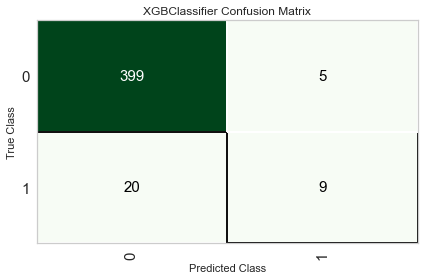

In [11]:
plot_model(clf_model_female_angry, plot='confusion_matrix')

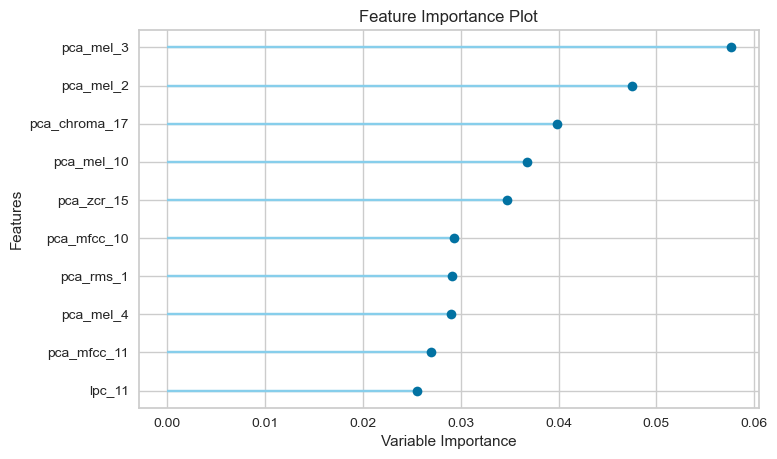

In [12]:
plot_model(clf_model_female_angry, plot = 'feature')

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

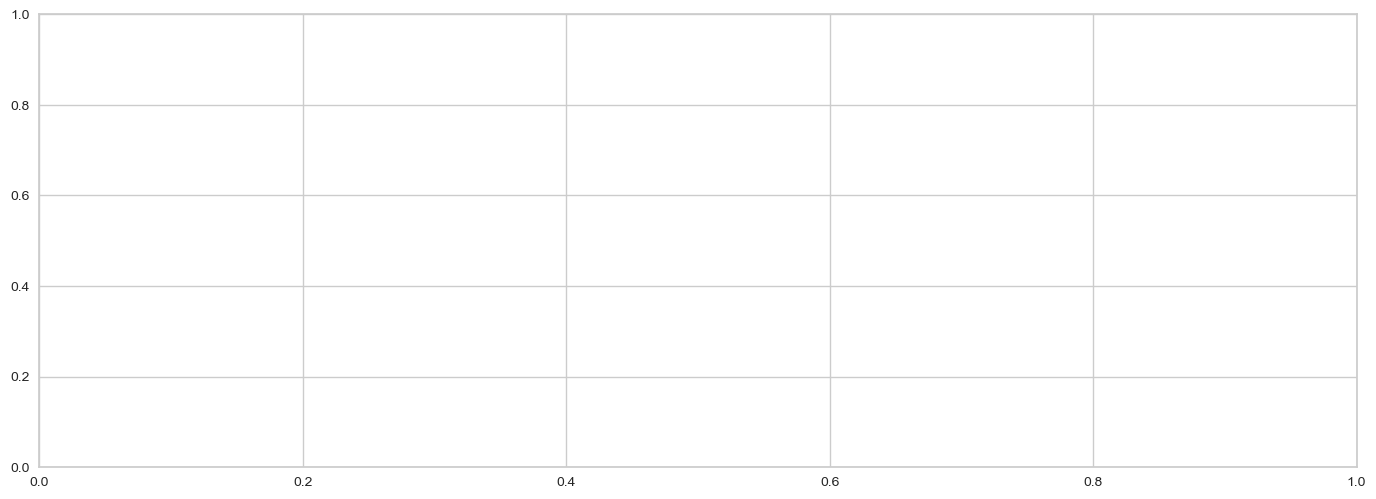

In [13]:
evaluate_model(clf_model_female_angry)

In [14]:
## NOW WE ARE CREATING A TRAIN AND TEST SPLIT 

setup(data = df, target = 'female_angry', train_size = 0.7)

,Description,Value
0,Session id,6363
1,Target,female_angry
2,Target type,Binary
3,Original data shape,"(1440, 119)"
4,Transformed data shape,"(1440, 119)"
5,Transformed train set shape,"(1007, 119)"
6,Transformed test set shape,"(433, 119)"
7,Numeric features,117
8,Categorical features,1
9,Preprocess,True


In [15]:
## TESTING THE MODEL 

clf_predict = predict_model(clf_model_female_angry)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Extreme Gradient Boosting,0.9885,0.9985,0.8621,0.9615,0.9091,0.9029,0.9045


In [16]:
## SAVING THE MODEL 
save_model(clf_model_female_angry, model_name = "best-model")

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=FastMemory(location=C:\Users\Pankil\AppData\Local\Temp\joblib),
          steps=[('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['pca_mfcc_1', 'pca_mfcc_2',
                                              'pca_mfcc_3', 'pca_mfcc_4',
                                              'pca_mfcc_5', 'pca_mfcc_6',
                                              'pca_mfcc_7', 'pca_mfcc_8',
                                              'pca_mfcc_9', 'pca_mfcc_10',
                                              'pca_mfcc_11', 'pca_mfcc_12',
                                              'pca_mfcc_13', 'pca_mfcc_14',
                                              'pca_mfcc_15', '...
                                grow_policy=None, importance_type=None,
                                interaction_constraints=None, learning_rate=None,
                                max_bin=None, max_cat_threshold=None,
                

In [17]:
loaded_bestmodel = load_model('best-model')
print(loaded_bestmodel)

Transformation Pipeline and Model Successfully Loaded
Pipeline(memory=FastMemory(location=C:\Users\Pankil\AppData\Local\Temp\joblib),
         steps=[('numerical_imputer',
                 TransformerWrapper(exclude=None,
                                    include=['pca_mfcc_1', 'pca_mfcc_2',
                                             'pca_mfcc_3', 'pca_mfcc_4',
                                             'pca_mfcc_5', 'pca_mfcc_6',
                                             'pca_mfcc_7', 'pca_mfcc_8',
                                             'pca_mfcc_9', 'pca_mfcc_10',
                                             'pca_mfcc_11', 'pca_mfcc_12',
                                             'pca_mfcc_13', 'pca_mfcc_14',
                                             'pca_mfcc_15', '...
                               grow_policy=None, importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, 

In [18]:
from sklearn import set_config
set_config(display = "diagram")
loaded_bestmodel[0]

TransformerWrapper(exclude=None,
                   include=['pca_mfcc_1', 'pca_mfcc_2', 'pca_mfcc_3',
                            'pca_mfcc_4', 'pca_mfcc_5', 'pca_mfcc_6',
                            'pca_mfcc_7', 'pca_mfcc_8', 'pca_mfcc_9',
                            'pca_mfcc_10', 'pca_mfcc_11', 'pca_mfcc_12',
                            'pca_mfcc_13', 'pca_mfcc_14', 'pca_mfcc_15',
                            'pca_mfcc_16', 'pca_mfcc_17', 'pca_mfcc_18',
                            'pca_mfcc_19', 'pca_mfcc_20', 'pca_zcr_1',
                            'pca_zcr_2', 'pca_zcr_3', 'pca_zcr_4', 'pca_zcr_5',
                            'pca_zcr_6', 'pca_zcr_7', 'pca_zcr_8', 'pca_zcr_9',
                            'pca_zcr_10', ...],
                   transformer=SimpleImputer(add_indicator=False, copy=True,
                                             fill_value=None,
                                             missing_values=nan,
                                             strategy='mean', verbose=0))

## MODEL CREATION FOR FEMALE_DISGUST

In [19]:
df_female_disgust = pd.read_csv("labels_oneHot_encoding.csv")

In [20]:
df_female_disgust.head()

,Unnamed: 0,pca_mfcc_1,pca_mfcc_2,pca_mfcc_3,pca_mfcc_4,pca_mfcc_5,pca_mfcc_6,pca_mfcc_7,pca_mfcc_8,pca_mfcc_9,...,female_neutral,female_sad,female_surprise,male_angry,male_disgust,male_fear,male_happy,male_neutral,male_sad,male_surprise
0,0,-109.834097,0.053196,-1.713443,-3.768810,-12.706864,1.144180,-6.869531,2.593850,-1.156389,...,0,0,0,0,0,0,0,1,0,0
1,1,-105.048512,1.461942,-1.111467,-1.051186,-12.977316,0.638045,-7.102971,1.234032,-0.479727,...,0,0,0,0,0,0,0,1,0,0
2,2,-103.732876,1.979006,-0.234491,-3.120535,-11.674955,-2.359368,-4.729244,2.976227,-0.869942,...,0,0,0,0,0,0,0,1,0,0
3,3,-97.492362,3.365092,-3.041923,-4.759261,-11.648275,-1.808196,-4.129106,2.605237,-0.737542,...,0,0,0,0,0,0,0,1,0,0
4,4,-140.114314,2.689681,1.560070,-2.531609,-10.692509,-1.370026,-4.236870,3.824275,-1.028487,...,0,0,0,0,0,0,0,1,0,0


In [21]:
df_female_disgust = df_female_disgust.drop(columns = ["Unnamed: 0" , "angry" , "disgust" , "fear" , "happy" , "neutral" , "sad" , "surprise" , "female_angry" ,"gender" , "female_fear" , "female_happy" , "female_neutral" , "female_sad" , "female_surprise",  "male_angry" ,"male_disgust" , "male_fear" , "male_happy" , "male_neutral" , "male_sad" , "male_surprise" , "path"] , axis = 1)

In [22]:
df_female_disgust

,pca_mfcc_1,pca_mfcc_2,pca_mfcc_3,pca_mfcc_4,pca_mfcc_5,pca_mfcc_6,pca_mfcc_7,pca_mfcc_8,pca_mfcc_9,pca_mfcc_10,...,pca_mel_12,pca_mel_13,pca_mel_14,pca_mel_15,pca_mel_16,pca_mel_17,pca_mel_18,pca_mel_19,pca_mel_20,female_disgust
0,-109.834097,0.053196,-1.713443,-3.768810,-12.706864,1.144180,-6.869531,2.593850,-1.156389,-1.082873,...,-12.453682,-6.254424,-5.244198,-3.020359,-9.067628,-10.647145,-3.032349,3.813296,7.941038,0
1,-105.048512,1.461942,-1.111467,-1.051186,-12.977316,0.638045,-7.102971,1.234032,-0.479727,-2.553631,...,-12.452970,-6.266163,-5.224034,-3.035165,-9.063099,-10.686008,-3.056054,3.814217,7.981975,0
2,-103.732876,1.979006,-0.234491,-3.120535,-11.674955,-2.359368,-4.729244,2.976227,-0.869942,-2.645149,...,-12.400792,-6.201859,-4.932682,-3.051120,-9.003797,-10.594508,-2.948012,3.825954,7.939555,0
3,-97.492362,3.365092,-3.041923,-4.759261,-11.648275,-1.808196,-4.129106,2.605237,-0.737542,-2.380594,...,-12.388350,-6.240878,-5.088265,-3.072477,-9.064833,-10.652129,-3.076305,3.825014,7.970841,0
4,-140.114314,2.689681,1.560070,-2.531609,-10.692509,-1.370026,-4.236870,3.824275,-1.028487,-1.048890,...,-12.481865,-6.251930,-5.254000,-3.022376,-9.094775,-10.720101,-3.061291,3.846036,8.028451,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1435,6.329283,-33.311096,-4.404714,1.265774,-5.841695,-3.765710,6.805589,1.519504,-5.432757,3.013519,...,-11.600367,-5.386196,-4.784159,-2.558900,-8.445470,-9.014881,-2.802913,2.115228,5.148347,0
1436,58.273193,-16.873473,0.658829,3.818962,-2.452251,-7.397771,4.108033,-4.647691,-8.771155,0.147697,...,-10.038614,-4.969969,0.702628,-4.386839,-5.705466,-9.565749,-2.252736,3.433042,6.049569,0
1437,50.322978,-24.018999,-2.144124,5.409782,-5.034831,-3.333233,3.990387,-6.313169,-7.588324,1.630459,...,-9.794808,-3.923318,-5.297086,-0.647961,-8.289325,-8.504386,-2.431791,3.444696,6.648919,0
1438,96.598991,-10.535742,-15.556110,-4.134222,1.205292,-10.156674,5.264862,-3.127371,-2.884152,6.398571,...,-8.466138,-1.576052,-5.665473,-1.245971,-8.273688,-8.090049,-2.695214,2.256860,3.922824,0


In [23]:
df_female_disgust['female_disgust'].value_counts()

0    1344
1      96
Name: female_disgust, dtype: int64

In [24]:
from pycaret.classification import *
clf = setup(data = df_female_disgust, target = 'female_disgust')

,Description,Value
0,Session id,8100
1,Target,female_disgust
2,Target type,Binary
3,Original data shape,"(1440, 119)"
4,Transformed data shape,"(1440, 119)"
5,Transformed train set shape,"(1007, 119)"
6,Transformed test set shape,"(433, 119)"
7,Numeric features,117
8,Categorical features,1
9,Preprocess,True


In [25]:
## COMAPRING MODELs

## TRAINING 

best = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.9553,0.9610,0.3690,0.8250,0.5062,0.4882,0.5330,4.3430
xgboost,Extreme Gradient Boosting,0.9523,0.9495,0.3262,0.9000,0.4680,0.4492,0.5177,4.4470
gbc,Gradient Boosting Classifier,0.9444,0.9238,0.2667,0.7500,0.3849,0.3627,0.4199,4.9010
ada,Ada Boost Classifier,0.9365,0.9182,0.3738,0.5662,0.4461,0.4136,0.4259,4.4740
ridge,Ridge Classifier,0.9355,0.0000,0.1452,0.4750,0.2171,0.1977,0.2385,4.0940
qda,Quadratic Discriminant Analysis,0.9335,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000,4.2120
et,Extra Trees Classifier,0.9335,0.9051,0.0000,0.0000,0.0000,0.0000,0.0000,4.2520
dummy,Dummy Classifier,0.9335,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000,4.1790
knn,K Neighbors Classifier,0.9325,0.7863,0.1071,0.4833,0.1694,0.1501,0.2005,4.5120
rf,Random Forest Classifier,0.9325,0.9023,0.0000,0.0000,0.0000,-0.0018,-0.0027,4.6280


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

In [26]:
print(best)

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=8100, reg_alpha=0.0, reg_lambda=0.0, silent='warn',
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)


In [27]:
## NOW WE ARE CREATING THE MODEL 
clf_model_female_disgust = create_model('xgboost')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9505,0.9392,0.2857,1.0000,0.4444,0.4268,0.5208
1,0.9703,0.9954,0.5714,1.0000,0.7273,0.7128,0.7441
2,0.9505,0.9514,0.2857,1.0000,0.4444,0.4268,0.5208
3,0.9406,0.9422,0.2857,0.6667,0.4000,0.3740,0.4115
4,0.9505,0.9574,0.2857,1.0000,0.4444,0.4268,0.5208
5,0.9505,0.9635,0.2857,1.0000,0.4444,0.4268,0.5208
6,0.9604,0.9818,0.4286,1.0000,0.6000,0.5826,0.6412
7,0.9500,0.9468,0.1667,1.0000,0.2857,0.2733,0.3978
8,0.9700,0.8475,0.5000,1.0000,0.6667,0.6528,0.6961


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

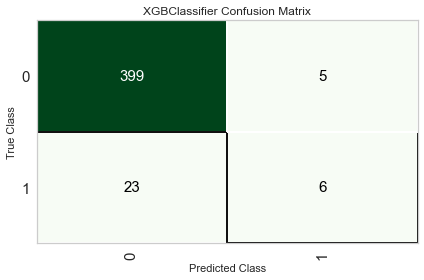

In [28]:
plot_model(clf_model_female_disgust, plot='confusion_matrix')

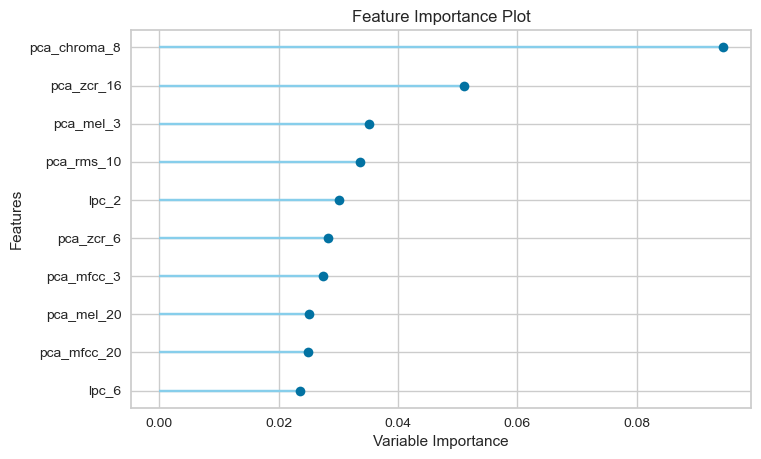

In [29]:
plot_model(clf_model_female_disgust, plot = 'feature')

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

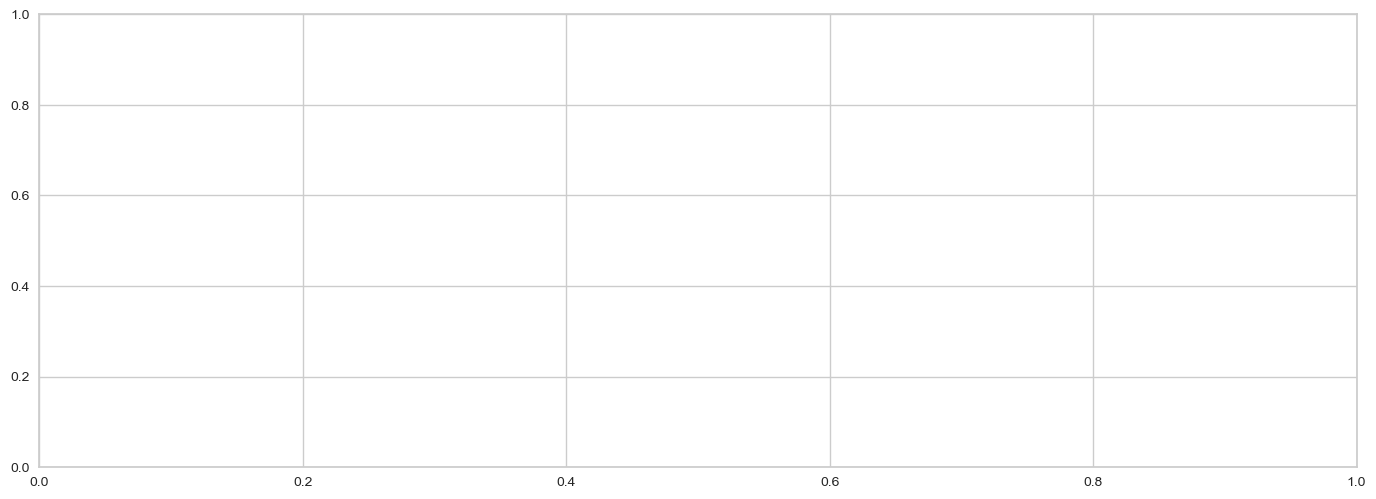

In [30]:
evaluate_model(clf_model_female_disgust)

In [31]:
## NOW WE ARE CREATING A TRAIN AND TEST SPLIT 

setup(data = df_female_disgust, target = 'female_disgust', train_size = 0.7)

,Description,Value
0,Session id,6728
1,Target,female_disgust
2,Target type,Binary
3,Original data shape,"(1440, 119)"
4,Transformed data shape,"(1440, 119)"
5,Transformed train set shape,"(1007, 119)"
6,Transformed test set shape,"(433, 119)"
7,Numeric features,117
8,Categorical features,1
9,Preprocess,True


In [32]:
## TESTING THE MODEL 

clf_predict = predict_model(clf_model_female_disgust)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Extreme Gradient Boosting,0.9815,0.9808,0.7931,0.9200,0.8519,0.8421,0.8447


In [33]:
## SAVING THE MODEL 
save_model(clf_model_female_disgust, model_name = "best-model")

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=FastMemory(location=C:\Users\Pankil\AppData\Local\Temp\joblib),
          steps=[('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['pca_mfcc_1', 'pca_mfcc_2',
                                              'pca_mfcc_3', 'pca_mfcc_4',
                                              'pca_mfcc_5', 'pca_mfcc_6',
                                              'pca_mfcc_7', 'pca_mfcc_8',
                                              'pca_mfcc_9', 'pca_mfcc_10',
                                              'pca_mfcc_11', 'pca_mfcc_12',
                                              'pca_mfcc_13', 'pca_mfcc_14',
                                              'pca_mfcc_15', '...
                                grow_policy=None, importance_type=None,
                                interaction_constraints=None, learning_rate=None,
                                max_bin=None, max_cat_threshold=None,
                

In [34]:
loaded_bestmodel = load_model('best-model')
print(loaded_bestmodel)

Transformation Pipeline and Model Successfully Loaded
Pipeline(memory=FastMemory(location=C:\Users\Pankil\AppData\Local\Temp\joblib),
         steps=[('numerical_imputer',
                 TransformerWrapper(exclude=None,
                                    include=['pca_mfcc_1', 'pca_mfcc_2',
                                             'pca_mfcc_3', 'pca_mfcc_4',
                                             'pca_mfcc_5', 'pca_mfcc_6',
                                             'pca_mfcc_7', 'pca_mfcc_8',
                                             'pca_mfcc_9', 'pca_mfcc_10',
                                             'pca_mfcc_11', 'pca_mfcc_12',
                                             'pca_mfcc_13', 'pca_mfcc_14',
                                             'pca_mfcc_15', '...
                               grow_policy=None, importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, 

In [35]:
from sklearn import set_config
set_config(display = "diagram")
loaded_bestmodel[0]

TransformerWrapper(exclude=None,
                   include=['pca_mfcc_1', 'pca_mfcc_2', 'pca_mfcc_3',
                            'pca_mfcc_4', 'pca_mfcc_5', 'pca_mfcc_6',
                            'pca_mfcc_7', 'pca_mfcc_8', 'pca_mfcc_9',
                            'pca_mfcc_10', 'pca_mfcc_11', 'pca_mfcc_12',
                            'pca_mfcc_13', 'pca_mfcc_14', 'pca_mfcc_15',
                            'pca_mfcc_16', 'pca_mfcc_17', 'pca_mfcc_18',
                            'pca_mfcc_19', 'pca_mfcc_20', 'pca_zcr_1',
                            'pca_zcr_2', 'pca_zcr_3', 'pca_zcr_4', 'pca_zcr_5',
                            'pca_zcr_6', 'pca_zcr_7', 'pca_zcr_8', 'pca_zcr_9',
                            'pca_zcr_10', ...],
                   transformer=SimpleImputer(add_indicator=False, copy=True,
                                             fill_value=None,
                                             missing_values=nan,
                                             strategy='mean', verbose=0))

## MODEL CREATION FOR FEMALE FEAR

In [36]:
df_female_fear = pd.read_csv("labels_oneHot_encoding.csv")

In [37]:
df_female_fear.head()

,Unnamed: 0,pca_mfcc_1,pca_mfcc_2,pca_mfcc_3,pca_mfcc_4,pca_mfcc_5,pca_mfcc_6,pca_mfcc_7,pca_mfcc_8,pca_mfcc_9,...,female_neutral,female_sad,female_surprise,male_angry,male_disgust,male_fear,male_happy,male_neutral,male_sad,male_surprise
0,0,-109.834097,0.053196,-1.713443,-3.768810,-12.706864,1.144180,-6.869531,2.593850,-1.156389,...,0,0,0,0,0,0,0,1,0,0
1,1,-105.048512,1.461942,-1.111467,-1.051186,-12.977316,0.638045,-7.102971,1.234032,-0.479727,...,0,0,0,0,0,0,0,1,0,0
2,2,-103.732876,1.979006,-0.234491,-3.120535,-11.674955,-2.359368,-4.729244,2.976227,-0.869942,...,0,0,0,0,0,0,0,1,0,0
3,3,-97.492362,3.365092,-3.041923,-4.759261,-11.648275,-1.808196,-4.129106,2.605237,-0.737542,...,0,0,0,0,0,0,0,1,0,0
4,4,-140.114314,2.689681,1.560070,-2.531609,-10.692509,-1.370026,-4.236870,3.824275,-1.028487,...,0,0,0,0,0,0,0,1,0,0


In [38]:
df_female_fear = df_female_fear.drop(columns = ["Unnamed: 0" , "angry" , "disgust" , "fear" , "happy" , "neutral" , "sad" , "surprise" , "gender" ,"female_disgust" , "female_angry" , "female_happy" , "female_neutral" , "female_sad" , "female_surprise",  "male_angry" ,"male_disgust" , "male_fear" , "male_happy" , "male_neutral" , "male_sad" , "male_surprise" , "path"] , axis = 1)

In [39]:
df_female_fear.head()

,pca_mfcc_1,pca_mfcc_2,pca_mfcc_3,pca_mfcc_4,pca_mfcc_5,pca_mfcc_6,pca_mfcc_7,pca_mfcc_8,pca_mfcc_9,pca_mfcc_10,...,pca_mel_12,pca_mel_13,pca_mel_14,pca_mel_15,pca_mel_16,pca_mel_17,pca_mel_18,pca_mel_19,pca_mel_20,female_fear
0,-109.834097,0.053196,-1.713443,-3.768810,-12.706864,1.144180,-6.869531,2.593850,-1.156389,-1.082873,...,-12.453682,-6.254424,-5.244198,-3.020359,-9.067628,-10.647145,-3.032349,3.813296,7.941038,0
1,-105.048512,1.461942,-1.111467,-1.051186,-12.977316,0.638045,-7.102971,1.234032,-0.479727,-2.553631,...,-12.452970,-6.266163,-5.224034,-3.035165,-9.063099,-10.686008,-3.056054,3.814217,7.981975,0
2,-103.732876,1.979006,-0.234491,-3.120535,-11.674955,-2.359368,-4.729244,2.976227,-0.869942,-2.645149,...,-12.400792,-6.201859,-4.932682,-3.051120,-9.003797,-10.594508,-2.948012,3.825954,7.939555,0
3,-97.492362,3.365092,-3.041923,-4.759261,-11.648275,-1.808196,-4.129106,2.605237,-0.737542,-2.380594,...,-12.388350,-6.240878,-5.088265,-3.072477,-9.064833,-10.652129,-3.076305,3.825014,7.970841,0
4,-140.114314,2.689681,1.560070,-2.531609,-10.692509,-1.370026,-4.236870,3.824275,-1.028487,-1.048890,...,-12.481865,-6.251930,-5.254000,-3.022376,-9.094775,-10.720101,-3.061291,3.846036,8.028451,0


In [40]:
df_female_fear['female_fear'].value_counts()

0    1344
1      96
Name: female_fear, dtype: int64

In [41]:
from pycaret.classification import *
clf = setup(data = df_female_fear, target = 'female_fear')

,Description,Value
0,Session id,4312
1,Target,female_fear
2,Target type,Binary
3,Original data shape,"(1440, 119)"
4,Transformed data shape,"(1440, 119)"
5,Transformed train set shape,"(1007, 119)"
6,Transformed test set shape,"(433, 119)"
7,Numeric features,117
8,Categorical features,1
9,Preprocess,True


In [42]:
## COMAPRING MODELs

## TRAINING 

best = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.9493,0.9361,0.2643,0.7167,0.3701,0.3564,0.4105,5.2960
gbc,Gradient Boosting Classifier,0.9484,0.9136,0.2667,0.8833,0.4013,0.3828,0.4618,4.9370
xgboost,Extreme Gradient Boosting,0.9444,0.9304,0.2381,0.7917,0.3557,0.3358,0.4066,5.1930
ada,Ada Boost Classifier,0.9404,0.8809,0.3857,0.5862,0.4527,0.4239,0.4399,4.5160
rf,Random Forest Classifier,0.9395,0.8940,0.0929,0.5000,0.1536,0.1468,0.2063,4.4780
et,Extra Trees Classifier,0.9375,0.9055,0.0619,0.4000,0.1071,0.1020,0.1529,5.0850
knn,K Neighbors Classifier,0.9335,0.7884,0.1524,0.3933,0.2072,0.1870,0.2128,4.4540
qda,Quadratic Discriminant Analysis,0.9335,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000,4.4670
dummy,Dummy Classifier,0.9335,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000,4.2910
ridge,Ridge Classifier,0.9305,0.0000,0.1833,0.4150,0.2495,0.2214,0.2427,4.5900


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

In [43]:
print(best)

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=4312, reg_alpha=0.0, reg_lambda=0.0, silent='warn',
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)


In [44]:
## NOW WE ARE CREATING THE MODEL 
clf_model_female_fear = create_model('xgboost')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9406,0.8723,0.2857,0.6667,0.4000,0.3740,0.4115
1,0.9406,0.8906,0.1429,1.0000,0.2500,0.2368,0.3665
2,0.9505,0.7933,0.4286,0.7500,0.5455,0.5213,0.5443
3,0.9307,0.9666,0.1429,0.5000,0.2222,0.1975,0.2410
4,0.9406,0.9635,0.1429,1.0000,0.2500,0.2368,0.3665
5,0.9505,0.9787,0.2857,1.0000,0.4444,0.4268,0.5208
6,0.9505,0.9772,0.2857,1.0000,0.4444,0.4268,0.5208
7,0.9600,0.9397,0.3333,1.0000,0.5000,0.4845,0.5654
8,0.9400,0.9344,0.1667,0.5000,0.2500,0.2268,0.2647


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

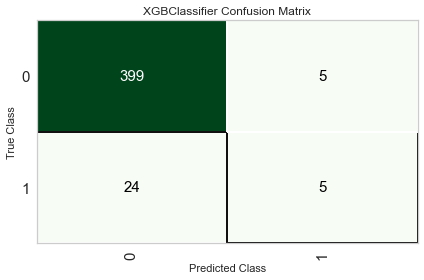

In [45]:
plot_model(clf_model_female_fear, plot='confusion_matrix')

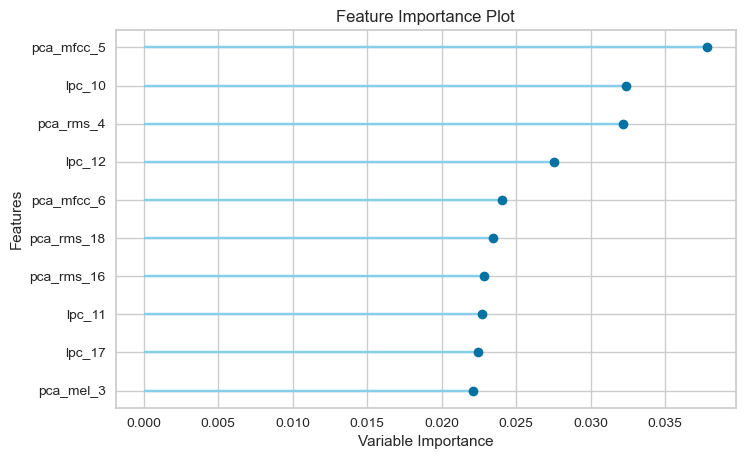

In [46]:
plot_model(clf_model_female_fear, plot = 'feature')

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

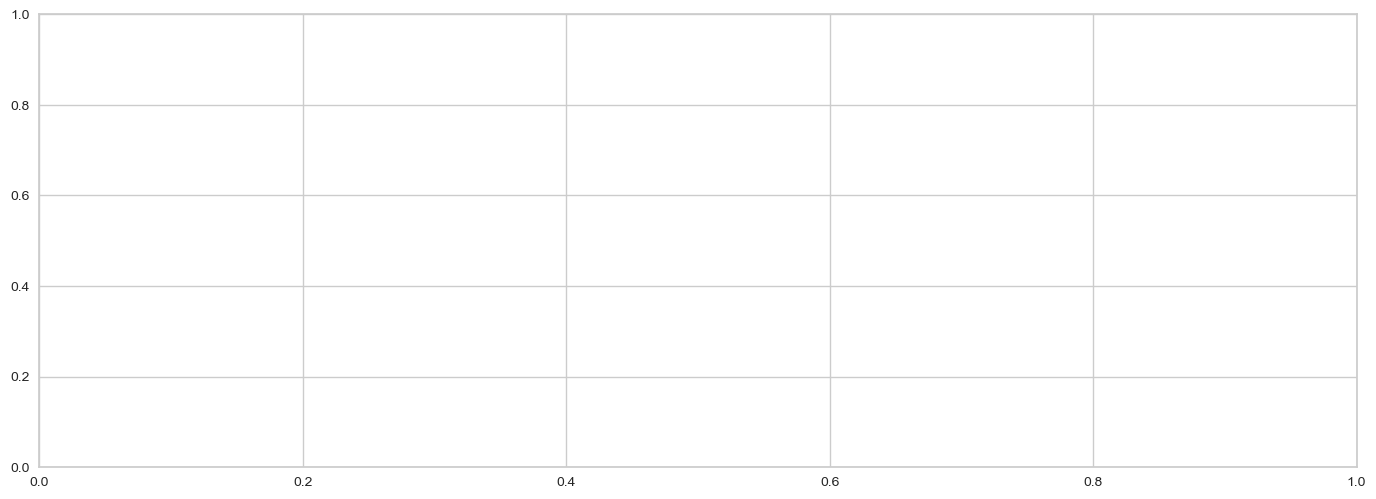

In [47]:
evaluate_model(clf_model_female_fear)

In [48]:
## NOW WE ARE CREATING A TRAIN AND TEST SPLIT 

setup(data = df_female_fear, target = 'female_fear', train_size = 0.7)

,Description,Value
0,Session id,509
1,Target,female_fear
2,Target type,Binary
3,Original data shape,"(1440, 119)"
4,Transformed data shape,"(1440, 119)"
5,Transformed train set shape,"(1007, 119)"
6,Transformed test set shape,"(433, 119)"
7,Numeric features,117
8,Categorical features,1
9,Preprocess,True


In [49]:
## TESTING THE MODEL 

clf_predict = predict_model(clf_model_female_fear)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Extreme Gradient Boosting,0.9769,0.9763,0.7931,0.8519,0.8214,0.8091,0.8097


In [50]:
## SAVING THE MODEL 
save_model(clf_model_female_fear, model_name = "best-model-female-fear")

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=FastMemory(location=C:\Users\Pankil\AppData\Local\Temp\joblib),
          steps=[('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['pca_mfcc_1', 'pca_mfcc_2',
                                              'pca_mfcc_3', 'pca_mfcc_4',
                                              'pca_mfcc_5', 'pca_mfcc_6',
                                              'pca_mfcc_7', 'pca_mfcc_8',
                                              'pca_mfcc_9', 'pca_mfcc_10',
                                              'pca_mfcc_11', 'pca_mfcc_12',
                                              'pca_mfcc_13', 'pca_mfcc_14',
                                              'pca_mfcc_15', '...
                                grow_policy=None, importance_type=None,
                                interaction_constraints=None, learning_rate=None,
                                max_bin=None, max_cat_threshold=None,
                

In [51]:
loaded_bestmodel_female_fear = load_model('best-model-female-fear')
print(loaded_bestmodel_female_fear)

Transformation Pipeline and Model Successfully Loaded
Pipeline(memory=FastMemory(location=C:\Users\Pankil\AppData\Local\Temp\joblib),
         steps=[('numerical_imputer',
                 TransformerWrapper(exclude=None,
                                    include=['pca_mfcc_1', 'pca_mfcc_2',
                                             'pca_mfcc_3', 'pca_mfcc_4',
                                             'pca_mfcc_5', 'pca_mfcc_6',
                                             'pca_mfcc_7', 'pca_mfcc_8',
                                             'pca_mfcc_9', 'pca_mfcc_10',
                                             'pca_mfcc_11', 'pca_mfcc_12',
                                             'pca_mfcc_13', 'pca_mfcc_14',
                                             'pca_mfcc_15', '...
                               grow_policy=None, importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, 

In [52]:
from sklearn import set_config
set_config(display = "diagram")
loaded_bestmodel_female_fear[0]

TransformerWrapper(exclude=None,
                   include=['pca_mfcc_1', 'pca_mfcc_2', 'pca_mfcc_3',
                            'pca_mfcc_4', 'pca_mfcc_5', 'pca_mfcc_6',
                            'pca_mfcc_7', 'pca_mfcc_8', 'pca_mfcc_9',
                            'pca_mfcc_10', 'pca_mfcc_11', 'pca_mfcc_12',
                            'pca_mfcc_13', 'pca_mfcc_14', 'pca_mfcc_15',
                            'pca_mfcc_16', 'pca_mfcc_17', 'pca_mfcc_18',
                            'pca_mfcc_19', 'pca_mfcc_20', 'pca_zcr_1',
                            'pca_zcr_2', 'pca_zcr_3', 'pca_zcr_4', 'pca_zcr_5',
                            'pca_zcr_6', 'pca_zcr_7', 'pca_zcr_8', 'pca_zcr_9',
                            'pca_zcr_10', ...],
                   transformer=SimpleImputer(add_indicator=False, copy=True,
                                             fill_value=None,
                                             missing_values=nan,
                                             strategy='mean', verbose=0))

## MODEL CREATION FOR FEMALE HAPPY 

In [53]:
df_female_happy = pd.read_csv("labels_oneHot_encoding.csv")

In [54]:
df_female_happy.head()

,Unnamed: 0,pca_mfcc_1,pca_mfcc_2,pca_mfcc_3,pca_mfcc_4,pca_mfcc_5,pca_mfcc_6,pca_mfcc_7,pca_mfcc_8,pca_mfcc_9,...,female_neutral,female_sad,female_surprise,male_angry,male_disgust,male_fear,male_happy,male_neutral,male_sad,male_surprise
0,0,-109.834097,0.053196,-1.713443,-3.768810,-12.706864,1.144180,-6.869531,2.593850,-1.156389,...,0,0,0,0,0,0,0,1,0,0
1,1,-105.048512,1.461942,-1.111467,-1.051186,-12.977316,0.638045,-7.102971,1.234032,-0.479727,...,0,0,0,0,0,0,0,1,0,0
2,2,-103.732876,1.979006,-0.234491,-3.120535,-11.674955,-2.359368,-4.729244,2.976227,-0.869942,...,0,0,0,0,0,0,0,1,0,0
3,3,-97.492362,3.365092,-3.041923,-4.759261,-11.648275,-1.808196,-4.129106,2.605237,-0.737542,...,0,0,0,0,0,0,0,1,0,0
4,4,-140.114314,2.689681,1.560070,-2.531609,-10.692509,-1.370026,-4.236870,3.824275,-1.028487,...,0,0,0,0,0,0,0,1,0,0


In [55]:
df_female_happy = df_female_happy.drop(columns = ["Unnamed: 0" , "angry" , "disgust" , "fear" , "happy" , "neutral" , "sad" , "surprise" , "gender" ,"female_disgust" , "female_fear" , "female_angry" , "female_neutral" , "female_sad" , "female_surprise",  "male_angry" ,"male_disgust" , "male_fear" , "male_happy" , "male_neutral" , "male_sad" , "male_surprise" , "path"] , axis = 1)

In [56]:
df_female_happy.head()

,pca_mfcc_1,pca_mfcc_2,pca_mfcc_3,pca_mfcc_4,pca_mfcc_5,pca_mfcc_6,pca_mfcc_7,pca_mfcc_8,pca_mfcc_9,pca_mfcc_10,...,pca_mel_12,pca_mel_13,pca_mel_14,pca_mel_15,pca_mel_16,pca_mel_17,pca_mel_18,pca_mel_19,pca_mel_20,female_happy
0,-109.834097,0.053196,-1.713443,-3.768810,-12.706864,1.144180,-6.869531,2.593850,-1.156389,-1.082873,...,-12.453682,-6.254424,-5.244198,-3.020359,-9.067628,-10.647145,-3.032349,3.813296,7.941038,0
1,-105.048512,1.461942,-1.111467,-1.051186,-12.977316,0.638045,-7.102971,1.234032,-0.479727,-2.553631,...,-12.452970,-6.266163,-5.224034,-3.035165,-9.063099,-10.686008,-3.056054,3.814217,7.981975,0
2,-103.732876,1.979006,-0.234491,-3.120535,-11.674955,-2.359368,-4.729244,2.976227,-0.869942,-2.645149,...,-12.400792,-6.201859,-4.932682,-3.051120,-9.003797,-10.594508,-2.948012,3.825954,7.939555,0
3,-97.492362,3.365092,-3.041923,-4.759261,-11.648275,-1.808196,-4.129106,2.605237,-0.737542,-2.380594,...,-12.388350,-6.240878,-5.088265,-3.072477,-9.064833,-10.652129,-3.076305,3.825014,7.970841,0
4,-140.114314,2.689681,1.560070,-2.531609,-10.692509,-1.370026,-4.236870,3.824275,-1.028487,-1.048890,...,-12.481865,-6.251930,-5.254000,-3.022376,-9.094775,-10.720101,-3.061291,3.846036,8.028451,0


In [57]:
from pycaret.classification import *
clf = setup(data = df_female_happy, target = 'female_happy')

,Description,Value
0,Session id,7621
1,Target,female_happy
2,Target type,Binary
3,Original data shape,"(1440, 119)"
4,Transformed data shape,"(1440, 119)"
5,Transformed train set shape,"(1007, 119)"
6,Transformed test set shape,"(433, 119)"
7,Numeric features,117
8,Categorical features,1
9,Preprocess,True


In [58]:
## COMAPRING MODELs

## TRAINING 

best = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
xgboost,Extreme Gradient Boosting,0.9484,0.9221,0.2714,0.7833,0.3917,0.3751,0.4364,4.7450
lightgbm,Light Gradient Boosting Machine,0.9484,0.9447,0.2429,0.9667,0.3730,0.3575,0.4571,4.9450
gbc,Gradient Boosting Classifier,0.9424,0.8964,0.1976,0.7583,0.2936,0.2775,0.3544,5.1620
rf,Random Forest Classifier,0.9335,0.8380,0.0000,0.0000,0.0000,0.0000,0.0000,4.6880
qda,Quadratic Discriminant Analysis,0.9335,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000,4.7820
et,Extra Trees Classifier,0.9335,0.8621,0.0000,0.0000,0.0000,0.0000,0.0000,4.3810
dummy,Dummy Classifier,0.9335,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000,4.5650
lr,Logistic Regression,0.9325,0.9167,0.4952,0.4726,0.4784,0.4429,0.4457,4.6930
knn,K Neighbors Classifier,0.9315,0.7916,0.1071,0.4500,0.1694,0.1487,0.1931,4.5710
ada,Ada Boost Classifier,0.9315,0.9117,0.3405,0.5000,0.3931,0.3594,0.3729,4.7370


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

In [59]:
print(best)

XGBClassifier(base_score=None, booster='gbtree', callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=-1, num_parallel_tree=None,
              objective='binary:logistic', predictor=None, ...)


In [60]:
## NOW WE ARE CREATING THE MODEL 
clf_model_female_happy = create_model('gbc')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9406,0.8921,0.1429,1.0000,0.2500,0.2368,0.3665
1,0.9406,0.9529,0.1429,1.0000,0.2500,0.2368,0.3665
2,0.9406,0.8450,0.2857,0.6667,0.4000,0.3740,0.4115
3,0.9406,0.9711,0.2857,0.6667,0.4000,0.3740,0.4115
4,0.9406,0.9195,0.1429,1.0000,0.2500,0.2368,0.3665
5,0.9406,0.8799,0.1429,1.0000,0.2500,0.2368,0.3665
6,0.9307,0.8009,0.0000,0.0000,0.0000,0.0000,0.0000
7,0.9600,0.9592,0.5000,0.7500,0.6000,0.5798,0.5931
8,0.9400,0.8989,0.1667,0.5000,0.2500,0.2268,0.2647


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

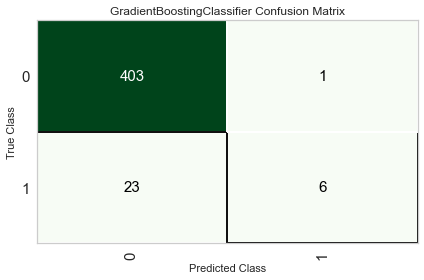

In [61]:
plot_model(clf_model_female_happy, plot='confusion_matrix')

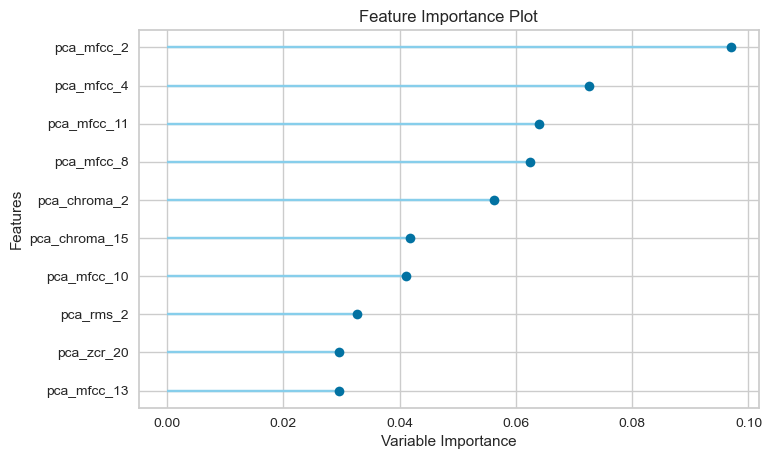

In [62]:
plot_model(clf_model_female_happy, plot = 'feature')

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

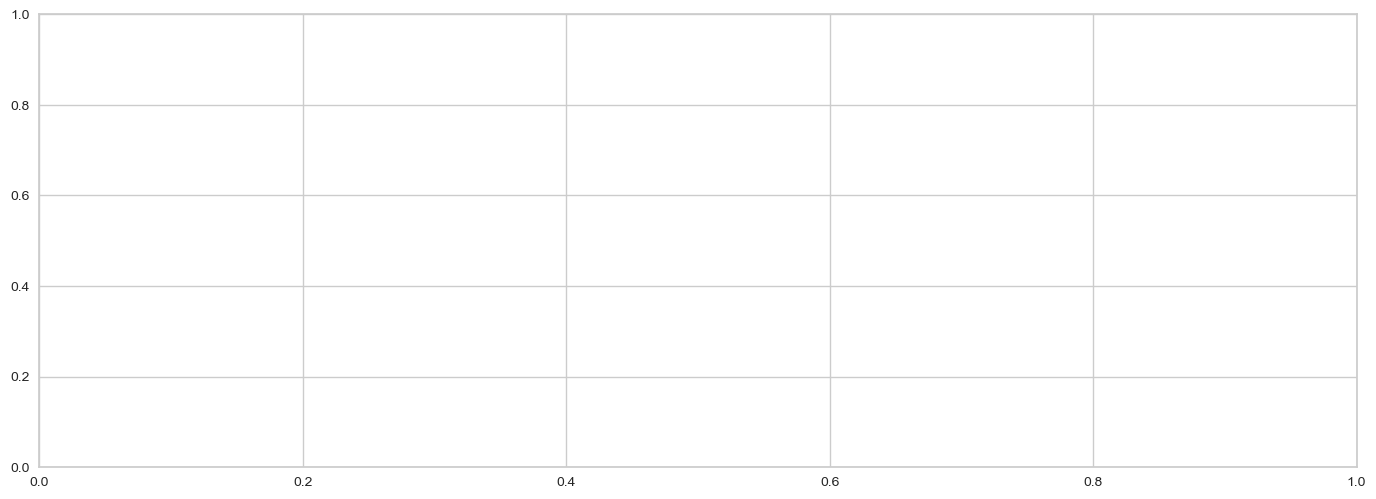

In [63]:
evaluate_model(clf_model_female_happy)

In [64]:
## NOW WE ARE CREATING A TRAIN AND TEST SPLIT 

setup(data = df_female_happy, target = 'female_happy', train_size = 0.7)

,Description,Value
0,Session id,7969
1,Target,female_happy
2,Target type,Binary
3,Original data shape,"(1440, 119)"
4,Transformed data shape,"(1440, 119)"
5,Transformed train set shape,"(1007, 119)"
6,Transformed test set shape,"(433, 119)"
7,Numeric features,117
8,Categorical features,1
9,Preprocess,True


In [65]:
## TESTING THE MODEL 

clf_predict = predict_model(clf_model_female_happy)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Gradient Boosting Classifier,0.9838,0.9689,0.7931,0.9583,0.8679,0.8594,0.8638


In [66]:
## SAVING THE MODEL 
save_model(clf_model_female_happy, model_name = "best-model-female-happy")

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=FastMemory(location=C:\Users\Pankil\AppData\Local\Temp\joblib),
          steps=[('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['pca_mfcc_1', 'pca_mfcc_2',
                                              'pca_mfcc_3', 'pca_mfcc_4',
                                              'pca_mfcc_5', 'pca_mfcc_6',
                                              'pca_mfcc_7', 'pca_mfcc_8',
                                              'pca_mfcc_9', 'pca_mfcc_10',
                                              'pca_mfcc_11', 'pca_mfcc_12',
                                              'pca_mfcc_13', 'pca_mfcc_14',
                                              'pca_mfcc_15', '...
                                             criterion='friedman_mse', init=None,
                                             learning_rate=0.1, loss='deviance',
                                             max_depth=3, max_features=None,


In [67]:
loaded_bestmodel_female_happy = load_model('best-model-female-happy')
print(loaded_bestmodel_female_happy)

Transformation Pipeline and Model Successfully Loaded
Pipeline(memory=FastMemory(location=C:\Users\Pankil\AppData\Local\Temp\joblib),
         steps=[('numerical_imputer',
                 TransformerWrapper(exclude=None,
                                    include=['pca_mfcc_1', 'pca_mfcc_2',
                                             'pca_mfcc_3', 'pca_mfcc_4',
                                             'pca_mfcc_5', 'pca_mfcc_6',
                                             'pca_mfcc_7', 'pca_mfcc_8',
                                             'pca_mfcc_9', 'pca_mfcc_10',
                                             'pca_mfcc_11', 'pca_mfcc_12',
                                             'pca_mfcc_13', 'pca_mfcc_14',
                                             'pca_mfcc_15', '...
                                            criterion='friedman_mse', init=None,
                                            learning_rate=0.1, loss='deviance',
                                    

In [68]:
from sklearn import set_config
set_config(display = "diagram")
loaded_bestmodel_female_happy[0]

TransformerWrapper(exclude=None,
                   include=['pca_mfcc_1', 'pca_mfcc_2', 'pca_mfcc_3',
                            'pca_mfcc_4', 'pca_mfcc_5', 'pca_mfcc_6',
                            'pca_mfcc_7', 'pca_mfcc_8', 'pca_mfcc_9',
                            'pca_mfcc_10', 'pca_mfcc_11', 'pca_mfcc_12',
                            'pca_mfcc_13', 'pca_mfcc_14', 'pca_mfcc_15',
                            'pca_mfcc_16', 'pca_mfcc_17', 'pca_mfcc_18',
                            'pca_mfcc_19', 'pca_mfcc_20', 'pca_zcr_1',
                            'pca_zcr_2', 'pca_zcr_3', 'pca_zcr_4', 'pca_zcr_5',
                            'pca_zcr_6', 'pca_zcr_7', 'pca_zcr_8', 'pca_zcr_9',
                            'pca_zcr_10', ...],
                   transformer=SimpleImputer(add_indicator=False, copy=True,
                                             fill_value=None,
                                             missing_values=nan,
                                             strategy='mean', verbose=0))

## MODEL CREATION FOR MALE ANGRY 

In [69]:
df_male_angry = pd.read_csv("labels_oneHot_encoding.csv")

In [70]:
df_male_angry.head()

,Unnamed: 0,pca_mfcc_1,pca_mfcc_2,pca_mfcc_3,pca_mfcc_4,pca_mfcc_5,pca_mfcc_6,pca_mfcc_7,pca_mfcc_8,pca_mfcc_9,...,female_neutral,female_sad,female_surprise,male_angry,male_disgust,male_fear,male_happy,male_neutral,male_sad,male_surprise
0,0,-109.834097,0.053196,-1.713443,-3.768810,-12.706864,1.144180,-6.869531,2.593850,-1.156389,...,0,0,0,0,0,0,0,1,0,0
1,1,-105.048512,1.461942,-1.111467,-1.051186,-12.977316,0.638045,-7.102971,1.234032,-0.479727,...,0,0,0,0,0,0,0,1,0,0
2,2,-103.732876,1.979006,-0.234491,-3.120535,-11.674955,-2.359368,-4.729244,2.976227,-0.869942,...,0,0,0,0,0,0,0,1,0,0
3,3,-97.492362,3.365092,-3.041923,-4.759261,-11.648275,-1.808196,-4.129106,2.605237,-0.737542,...,0,0,0,0,0,0,0,1,0,0
4,4,-140.114314,2.689681,1.560070,-2.531609,-10.692509,-1.370026,-4.236870,3.824275,-1.028487,...,0,0,0,0,0,0,0,1,0,0


In [71]:
df_male_angry = df_male_angry.drop(columns = ["Unnamed: 0" , "angry" , "disgust" , "fear" , "happy" , "neutral" , "sad" , "surprise" , "gender" ,"female_disgust" , "female_fear" , "female_happy" , "female_neutral" , "female_sad" , "female_surprise",  "female_angry" ,"male_disgust" , "male_fear" , "male_happy" , "male_neutral" , "male_sad" , "male_surprise" , "path"] , axis = 1)

In [72]:
df_male_angry.head()

,pca_mfcc_1,pca_mfcc_2,pca_mfcc_3,pca_mfcc_4,pca_mfcc_5,pca_mfcc_6,pca_mfcc_7,pca_mfcc_8,pca_mfcc_9,pca_mfcc_10,...,pca_mel_12,pca_mel_13,pca_mel_14,pca_mel_15,pca_mel_16,pca_mel_17,pca_mel_18,pca_mel_19,pca_mel_20,male_angry
0,-109.834097,0.053196,-1.713443,-3.768810,-12.706864,1.144180,-6.869531,2.593850,-1.156389,-1.082873,...,-12.453682,-6.254424,-5.244198,-3.020359,-9.067628,-10.647145,-3.032349,3.813296,7.941038,0
1,-105.048512,1.461942,-1.111467,-1.051186,-12.977316,0.638045,-7.102971,1.234032,-0.479727,-2.553631,...,-12.452970,-6.266163,-5.224034,-3.035165,-9.063099,-10.686008,-3.056054,3.814217,7.981975,0
2,-103.732876,1.979006,-0.234491,-3.120535,-11.674955,-2.359368,-4.729244,2.976227,-0.869942,-2.645149,...,-12.400792,-6.201859,-4.932682,-3.051120,-9.003797,-10.594508,-2.948012,3.825954,7.939555,0
3,-97.492362,3.365092,-3.041923,-4.759261,-11.648275,-1.808196,-4.129106,2.605237,-0.737542,-2.380594,...,-12.388350,-6.240878,-5.088265,-3.072477,-9.064833,-10.652129,-3.076305,3.825014,7.970841,0
4,-140.114314,2.689681,1.560070,-2.531609,-10.692509,-1.370026,-4.236870,3.824275,-1.028487,-1.048890,...,-12.481865,-6.251930,-5.254000,-3.022376,-9.094775,-10.720101,-3.061291,3.846036,8.028451,0


In [73]:
from pycaret.classification import *
clf = setup(data = df_male_angry, target = 'male_angry')

,Description,Value
0,Session id,3214
1,Target,male_angry
2,Target type,Binary
3,Original data shape,"(1440, 119)"
4,Transformed data shape,"(1440, 119)"
5,Transformed train set shape,"(1007, 119)"
6,Transformed test set shape,"(433, 119)"
7,Numeric features,117
8,Categorical features,1
9,Preprocess,True


In [74]:
## COMAPRING MODELs

## TRAINING 

best = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.9623,0.9454,0.4619,0.9600,0.6167,0.5996,0.6477,4.9160
gbc,Gradient Boosting Classifier,0.9583,0.9246,0.4190,0.9350,0.5628,0.5450,0.6012,5.4030
xgboost,Extreme Gradient Boosting,0.9533,0.9341,0.3881,0.8133,0.5168,0.4962,0.5378,5.2590
et,Extra Trees Classifier,0.9474,0.8972,0.2286,0.8500,0.3427,0.3288,0.4140,5.3310
rf,Random Forest Classifier,0.9454,0.8555,0.2310,0.7833,0.3358,0.3203,0.3935,5.1000
ridge,Ridge Classifier,0.9444,0.0000,0.2667,0.7400,0.3783,0.3574,0.4132,4.6230
ada,Ada Boost Classifier,0.9444,0.8944,0.3881,0.6783,0.4769,0.4502,0.4778,4.5670
knn,K Neighbors Classifier,0.9345,0.8081,0.2262,0.5333,0.3094,0.2819,0.3144,4.5130
qda,Quadratic Discriminant Analysis,0.9335,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000,4.7930
lda,Linear Discriminant Analysis,0.9335,0.8429,0.3429,0.5226,0.4022,0.3697,0.3842,4.7630


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

In [75]:
print(best)

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=3214, reg_alpha=0.0, reg_lambda=0.0, silent='warn',
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)


In [76]:
## NOW WE ARE CREATING THE MODEL 
clf_model_male_angry = create_model('lightgbm')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9604,0.9863,0.5714,0.8000,0.6667,0.6462,0.6566
1,0.9604,0.9711,0.4286,1.0000,0.6000,0.5826,0.6412
2,0.9604,0.9058,0.4286,1.0000,0.6000,0.5826,0.6412
3,0.9604,0.8541,0.4286,1.0000,0.6000,0.5826,0.6412
4,0.9604,0.9681,0.4286,1.0000,0.6000,0.5826,0.6412
5,0.9604,0.9924,0.4286,1.0000,0.6000,0.5826,0.6412
6,0.9604,0.9498,0.5714,0.8000,0.6667,0.6462,0.6566
7,0.9700,0.8883,0.5000,1.0000,0.6667,0.6528,0.6961
8,0.9600,0.9486,0.3333,1.0000,0.5000,0.4845,0.5654


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

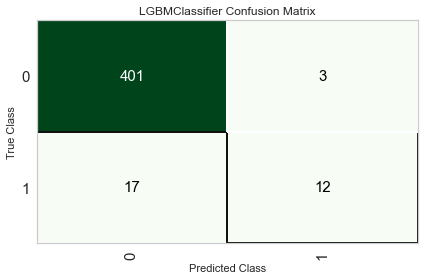

In [77]:
plot_model(clf_model_male_angry, plot='confusion_matrix')

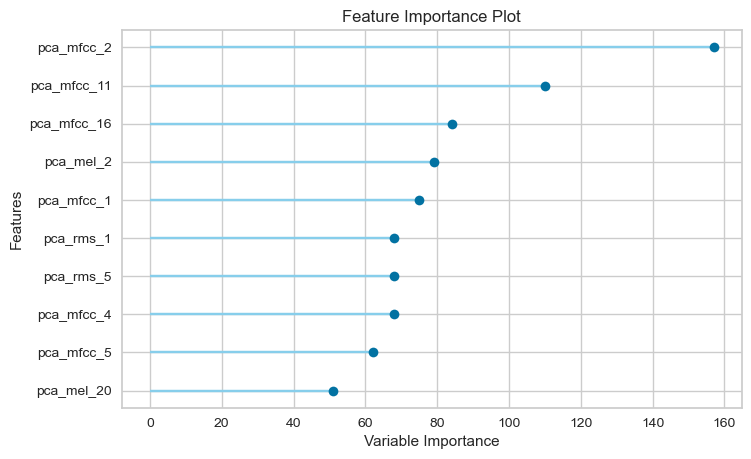

In [78]:
plot_model(clf_model_male_angry, plot = 'feature')

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

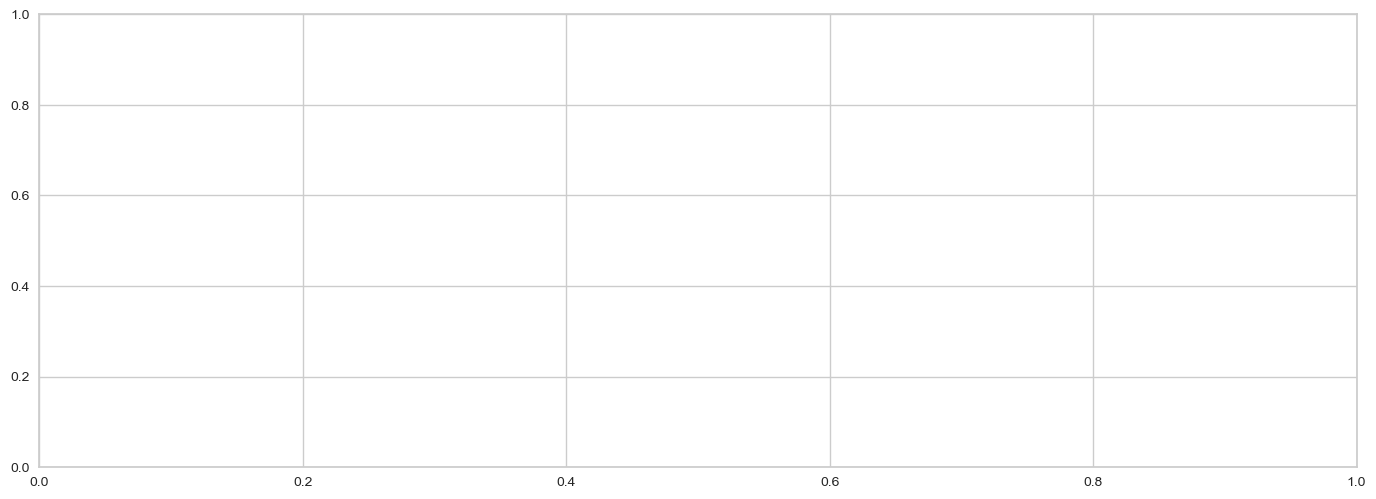

In [79]:
evaluate_model(clf_model_male_angry)

In [80]:
## NOW WE ARE CREATING A TRAIN AND TEST SPLIT 

setup(data = df_male_angry, target = 'male_angry', train_size = 0.7)

,Description,Value
0,Session id,5323
1,Target,male_angry
2,Target type,Binary
3,Original data shape,"(1440, 119)"
4,Transformed data shape,"(1440, 119)"
5,Transformed train set shape,"(1007, 119)"
6,Transformed test set shape,"(433, 119)"
7,Numeric features,117
8,Categorical features,1
9,Preprocess,True


In [81]:
## TESTING THE MODEL 

clf_predict = predict_model(clf_model_male_angry)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Light Gradient Boosting Machine,0.9838,0.9916,0.8276,0.9231,0.8727,0.8641,0.8656


In [82]:
## SAVING THE MODEL 
save_model(clf_model_male_angry, model_name = "best-model-male-angry")

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=FastMemory(location=C:\Users\Pankil\AppData\Local\Temp\joblib),
          steps=[('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['pca_mfcc_1', 'pca_mfcc_2',
                                              'pca_mfcc_3', 'pca_mfcc_4',
                                              'pca_mfcc_5', 'pca_mfcc_6',
                                              'pca_mfcc_7', 'pca_mfcc_8',
                                              'pca_mfcc_9', 'pca_mfcc_10',
                                              'pca_mfcc_11', 'pca_mfcc_12',
                                              'pca_mfcc_13', 'pca_mfcc_14',
                                              'pca_mfcc_15', '...
                  LGBMClassifier(boosting_type='gbdt', class_weight=None,
                                 colsample_bytree=1.0, importance_type='split',
                                 learning_rate=0.1, max_depth=-1,
                    

In [83]:
loaded_bestmodel_male_angry = load_model('best-model-male-angry')
print(loaded_bestmodel_male_angry)

Transformation Pipeline and Model Successfully Loaded
Pipeline(memory=FastMemory(location=C:\Users\Pankil\AppData\Local\Temp\joblib),
         steps=[('numerical_imputer',
                 TransformerWrapper(exclude=None,
                                    include=['pca_mfcc_1', 'pca_mfcc_2',
                                             'pca_mfcc_3', 'pca_mfcc_4',
                                             'pca_mfcc_5', 'pca_mfcc_6',
                                             'pca_mfcc_7', 'pca_mfcc_8',
                                             'pca_mfcc_9', 'pca_mfcc_10',
                                             'pca_mfcc_11', 'pca_mfcc_12',
                                             'pca_mfcc_13', 'pca_mfcc_14',
                                             'pca_mfcc_15', '...
                 LGBMClassifier(boosting_type='gbdt', class_weight=None,
                                colsample_bytree=1.0, importance_type='split',
                                learning_rate

In [84]:
from sklearn import set_config
set_config(display = "diagram")
loaded_bestmodel_male_angry[0]

TransformerWrapper(exclude=None,
                   include=['pca_mfcc_1', 'pca_mfcc_2', 'pca_mfcc_3',
                            'pca_mfcc_4', 'pca_mfcc_5', 'pca_mfcc_6',
                            'pca_mfcc_7', 'pca_mfcc_8', 'pca_mfcc_9',
                            'pca_mfcc_10', 'pca_mfcc_11', 'pca_mfcc_12',
                            'pca_mfcc_13', 'pca_mfcc_14', 'pca_mfcc_15',
                            'pca_mfcc_16', 'pca_mfcc_17', 'pca_mfcc_18',
                            'pca_mfcc_19', 'pca_mfcc_20', 'pca_zcr_1',
                            'pca_zcr_2', 'pca_zcr_3', 'pca_zcr_4', 'pca_zcr_5',
                            'pca_zcr_6', 'pca_zcr_7', 'pca_zcr_8', 'pca_zcr_9',
                            'pca_zcr_10', ...],
                   transformer=SimpleImputer(add_indicator=False, copy=True,
                                             fill_value=None,
                                             missing_values=nan,
                                             strategy='mean', verbose=0))

## MODEL CREATION FOR MALE DISGUST

In [85]:
df_male_disgust = pd.read_csv("labels_oneHot_encoding.csv")

In [86]:
df_male_disgust.head()

,Unnamed: 0,pca_mfcc_1,pca_mfcc_2,pca_mfcc_3,pca_mfcc_4,pca_mfcc_5,pca_mfcc_6,pca_mfcc_7,pca_mfcc_8,pca_mfcc_9,...,female_neutral,female_sad,female_surprise,male_angry,male_disgust,male_fear,male_happy,male_neutral,male_sad,male_surprise
0,0,-109.834097,0.053196,-1.713443,-3.768810,-12.706864,1.144180,-6.869531,2.593850,-1.156389,...,0,0,0,0,0,0,0,1,0,0
1,1,-105.048512,1.461942,-1.111467,-1.051186,-12.977316,0.638045,-7.102971,1.234032,-0.479727,...,0,0,0,0,0,0,0,1,0,0
2,2,-103.732876,1.979006,-0.234491,-3.120535,-11.674955,-2.359368,-4.729244,2.976227,-0.869942,...,0,0,0,0,0,0,0,1,0,0
3,3,-97.492362,3.365092,-3.041923,-4.759261,-11.648275,-1.808196,-4.129106,2.605237,-0.737542,...,0,0,0,0,0,0,0,1,0,0
4,4,-140.114314,2.689681,1.560070,-2.531609,-10.692509,-1.370026,-4.236870,3.824275,-1.028487,...,0,0,0,0,0,0,0,1,0,0


In [87]:
df_male_disgust = df_male_disgust.drop(columns = ["Unnamed: 0" , "angry" , "disgust" , "fear" , "happy" , "neutral" , "sad" , "surprise" , "gender" ,"female_disgust" , "female_fear" , "female_happy" , "female_neutral" , "female_sad" , "female_surprise",  "male_angry" ,"female_angry" , "male_fear" , "male_happy" , "male_neutral" , "male_sad" , "male_surprise" , "path"] , axis = 1)

In [88]:
df_male_disgust.head()

,pca_mfcc_1,pca_mfcc_2,pca_mfcc_3,pca_mfcc_4,pca_mfcc_5,pca_mfcc_6,pca_mfcc_7,pca_mfcc_8,pca_mfcc_9,pca_mfcc_10,...,pca_mel_12,pca_mel_13,pca_mel_14,pca_mel_15,pca_mel_16,pca_mel_17,pca_mel_18,pca_mel_19,pca_mel_20,male_disgust
0,-109.834097,0.053196,-1.713443,-3.768810,-12.706864,1.144180,-6.869531,2.593850,-1.156389,-1.082873,...,-12.453682,-6.254424,-5.244198,-3.020359,-9.067628,-10.647145,-3.032349,3.813296,7.941038,0
1,-105.048512,1.461942,-1.111467,-1.051186,-12.977316,0.638045,-7.102971,1.234032,-0.479727,-2.553631,...,-12.452970,-6.266163,-5.224034,-3.035165,-9.063099,-10.686008,-3.056054,3.814217,7.981975,0
2,-103.732876,1.979006,-0.234491,-3.120535,-11.674955,-2.359368,-4.729244,2.976227,-0.869942,-2.645149,...,-12.400792,-6.201859,-4.932682,-3.051120,-9.003797,-10.594508,-2.948012,3.825954,7.939555,0
3,-97.492362,3.365092,-3.041923,-4.759261,-11.648275,-1.808196,-4.129106,2.605237,-0.737542,-2.380594,...,-12.388350,-6.240878,-5.088265,-3.072477,-9.064833,-10.652129,-3.076305,3.825014,7.970841,0
4,-140.114314,2.689681,1.560070,-2.531609,-10.692509,-1.370026,-4.236870,3.824275,-1.028487,-1.048890,...,-12.481865,-6.251930,-5.254000,-3.022376,-9.094775,-10.720101,-3.061291,3.846036,8.028451,0


In [89]:
df_male_disgust['male_disgust'].value_counts()

0    1344
1      96
Name: male_disgust, dtype: int64

In [90]:
from pycaret.classification import *
clf = setup(data = df_male_disgust, target = 'male_disgust')

,Description,Value
0,Session id,5051
1,Target,male_disgust
2,Target type,Binary
3,Original data shape,"(1440, 119)"
4,Transformed data shape,"(1440, 119)"
5,Transformed train set shape,"(1007, 119)"
6,Transformed test set shape,"(433, 119)"
7,Numeric features,117
8,Categorical features,1
9,Preprocess,True


In [91]:
## COMAPRING MODELs

## TRAINING 

best = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.9444,0.8961,0.1929,0.6667,0.2861,0.2729,0.3342,5.6340
lr,Logistic Regression,0.9414,0.8785,0.4452,0.6086,0.5048,0.4750,0.4862,4.5950
xgboost,Extreme Gradient Boosting,0.9394,0.8828,0.1190,0.4333,0.1839,0.1740,0.2155,8.5430
gbc,Gradient Boosting Classifier,0.9345,0.8246,0.0476,0.2000,0.0750,0.0686,0.0879,5.1140
rf,Random Forest Classifier,0.9335,0.8213,0.0000,0.0000,0.0000,0.0000,0.0000,4.9360
qda,Quadratic Discriminant Analysis,0.9335,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000,5.5600
et,Extra Trees Classifier,0.9335,0.8894,0.0000,0.0000,0.0000,0.0000,0.0000,5.4520
dummy,Dummy Classifier,0.9335,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000,4.9910
ridge,Ridge Classifier,0.9275,0.0000,0.0452,0.1500,0.0694,0.0524,0.0617,4.8190
knn,K Neighbors Classifier,0.9245,0.7662,0.1190,0.2800,0.1547,0.1275,0.1441,4.4140


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

In [92]:
print(best)

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=5051, reg_alpha=0.0, reg_lambda=0.0, silent='warn',
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)


In [93]:
## NOW WE ARE CREATING THE MODEL 
clf_model_male_disgust = create_model('xgboost')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9307,0.9711,0.0000,0.0000,0.0000,0.0000,0.0000
1,0.9208,0.7401,0.1429,0.3333,0.2000,0.1653,0.1819
2,0.9505,0.8617,0.2857,1.0000,0.4444,0.4268,0.5208
3,0.9505,0.9514,0.2857,1.0000,0.4444,0.4268,0.5208
4,0.9406,0.8815,0.1429,1.0000,0.2500,0.2368,0.3665
5,0.9307,0.8541,0.0000,0.0000,0.0000,0.0000,0.0000
6,0.9307,0.9438,0.0000,0.0000,0.0000,0.0000,0.0000
7,0.9600,0.9681,0.3333,1.0000,0.5000,0.4845,0.5654
8,0.9400,0.8617,0.0000,0.0000,0.0000,0.0000,0.0000


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

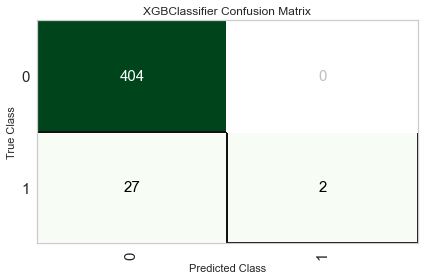

In [94]:
plot_model(clf_model_male_disgust, plot='confusion_matrix')

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

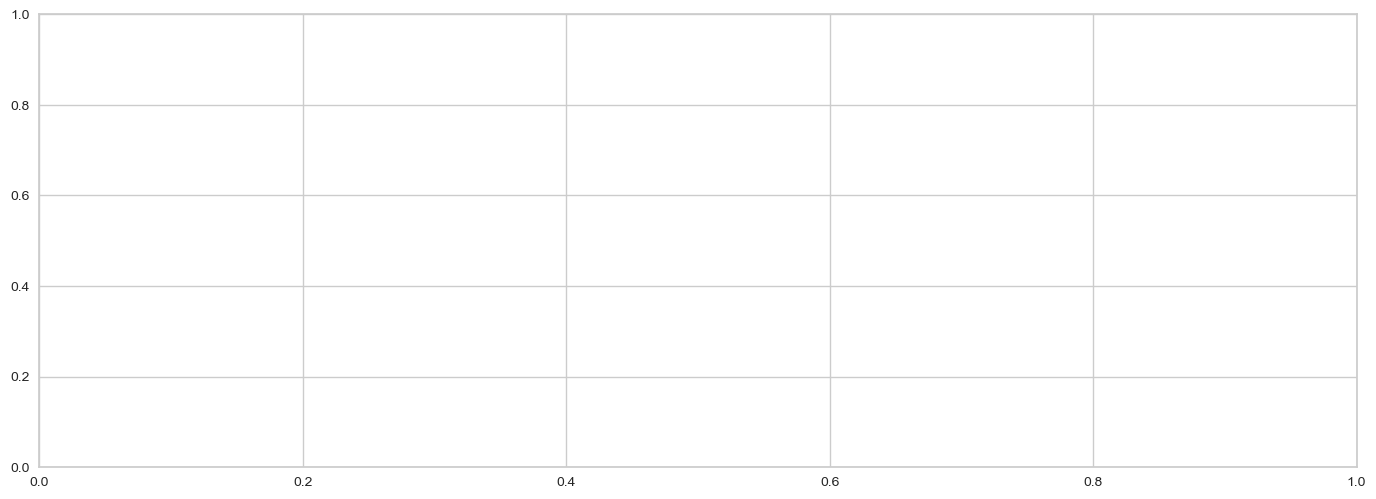

In [95]:
evaluate_model(clf_model_male_disgust)

In [96]:
## NOW WE ARE CREATING A TRAIN AND TEST SPLIT 

setup(data = df_male_disgust, target = 'male_disgust', train_size = 0.7)

,Description,Value
0,Session id,6651
1,Target,male_disgust
2,Target type,Binary
3,Original data shape,"(1440, 119)"
4,Transformed data shape,"(1440, 119)"
5,Transformed train set shape,"(1007, 119)"
6,Transformed test set shape,"(433, 119)"
7,Numeric features,117
8,Categorical features,1
9,Preprocess,True


In [97]:
## TESTING THE MODEL 

clf_predict = predict_model(clf_model_male_disgust)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Extreme Gradient Boosting,0.9746,0.9517,0.6207,1.0000,0.7660,0.7533,0.7773


In [98]:
## SAVING THE MODEL 
save_model(clf_model_male_disgust, model_name = "best-model-male-disgust")

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=FastMemory(location=C:\Users\Pankil\AppData\Local\Temp\joblib),
          steps=[('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['pca_mfcc_1', 'pca_mfcc_2',
                                              'pca_mfcc_3', 'pca_mfcc_4',
                                              'pca_mfcc_5', 'pca_mfcc_6',
                                              'pca_mfcc_7', 'pca_mfcc_8',
                                              'pca_mfcc_9', 'pca_mfcc_10',
                                              'pca_mfcc_11', 'pca_mfcc_12',
                                              'pca_mfcc_13', 'pca_mfcc_14',
                                              'pca_mfcc_15', '...
                                grow_policy=None, importance_type=None,
                                interaction_constraints=None, learning_rate=None,
                                max_bin=None, max_cat_threshold=None,
                

In [99]:
loaded_bestmodel_male_disgust = load_model('best-model')
print(loaded_bestmodel_male_disgust)

Transformation Pipeline and Model Successfully Loaded
Pipeline(memory=FastMemory(location=C:\Users\Pankil\AppData\Local\Temp\joblib),
         steps=[('numerical_imputer',
                 TransformerWrapper(exclude=None,
                                    include=['pca_mfcc_1', 'pca_mfcc_2',
                                             'pca_mfcc_3', 'pca_mfcc_4',
                                             'pca_mfcc_5', 'pca_mfcc_6',
                                             'pca_mfcc_7', 'pca_mfcc_8',
                                             'pca_mfcc_9', 'pca_mfcc_10',
                                             'pca_mfcc_11', 'pca_mfcc_12',
                                             'pca_mfcc_13', 'pca_mfcc_14',
                                             'pca_mfcc_15', '...
                               grow_policy=None, importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, 

In [100]:
from sklearn import set_config
set_config(display = "diagram")
loaded_bestmodel_male_disgust[0]

TransformerWrapper(exclude=None,
                   include=['pca_mfcc_1', 'pca_mfcc_2', 'pca_mfcc_3',
                            'pca_mfcc_4', 'pca_mfcc_5', 'pca_mfcc_6',
                            'pca_mfcc_7', 'pca_mfcc_8', 'pca_mfcc_9',
                            'pca_mfcc_10', 'pca_mfcc_11', 'pca_mfcc_12',
                            'pca_mfcc_13', 'pca_mfcc_14', 'pca_mfcc_15',
                            'pca_mfcc_16', 'pca_mfcc_17', 'pca_mfcc_18',
                            'pca_mfcc_19', 'pca_mfcc_20', 'pca_zcr_1',
                            'pca_zcr_2', 'pca_zcr_3', 'pca_zcr_4', 'pca_zcr_5',
                            'pca_zcr_6', 'pca_zcr_7', 'pca_zcr_8', 'pca_zcr_9',
                            'pca_zcr_10', ...],
                   transformer=SimpleImputer(add_indicator=False, copy=True,
                                             fill_value=None,
                                             missing_values=nan,
                                             strategy='mean', verbose=0))

## MODEL CREATION FOR MALE FEAR

In [103]:
df_male_fear = pd.read_csv("labels_oneHot_encoding.csv")

In [104]:
df_male_fear.head()

,Unnamed: 0,pca_mfcc_1,pca_mfcc_2,pca_mfcc_3,pca_mfcc_4,pca_mfcc_5,pca_mfcc_6,pca_mfcc_7,pca_mfcc_8,pca_mfcc_9,...,female_neutral,female_sad,female_surprise,male_angry,male_disgust,male_fear,male_happy,male_neutral,male_sad,male_surprise
0,0,-109.834097,0.053196,-1.713443,-3.768810,-12.706864,1.144180,-6.869531,2.593850,-1.156389,...,0,0,0,0,0,0,0,1,0,0
1,1,-105.048512,1.461942,-1.111467,-1.051186,-12.977316,0.638045,-7.102971,1.234032,-0.479727,...,0,0,0,0,0,0,0,1,0,0
2,2,-103.732876,1.979006,-0.234491,-3.120535,-11.674955,-2.359368,-4.729244,2.976227,-0.869942,...,0,0,0,0,0,0,0,1,0,0
3,3,-97.492362,3.365092,-3.041923,-4.759261,-11.648275,-1.808196,-4.129106,2.605237,-0.737542,...,0,0,0,0,0,0,0,1,0,0
4,4,-140.114314,2.689681,1.560070,-2.531609,-10.692509,-1.370026,-4.236870,3.824275,-1.028487,...,0,0,0,0,0,0,0,1,0,0


In [105]:
df_male_fear = df_male_fear.drop(columns = ["Unnamed: 0" , "angry" , "disgust" , "fear" , "happy" , "neutral" , "sad" , "surprise" , "gender" ,"female_disgust" , "female_fear" , "female_happy" , "female_neutral" , "female_sad" , "female_surprise",  "male_angry" ,"male_disgust" , "female_angry" , "male_happy" , "male_neutral" , "male_sad" , "male_surprise" , "path"] , axis = 1)

In [106]:
df_male_fear.head()

,pca_mfcc_1,pca_mfcc_2,pca_mfcc_3,pca_mfcc_4,pca_mfcc_5,pca_mfcc_6,pca_mfcc_7,pca_mfcc_8,pca_mfcc_9,pca_mfcc_10,...,pca_mel_12,pca_mel_13,pca_mel_14,pca_mel_15,pca_mel_16,pca_mel_17,pca_mel_18,pca_mel_19,pca_mel_20,male_fear
0,-109.834097,0.053196,-1.713443,-3.768810,-12.706864,1.144180,-6.869531,2.593850,-1.156389,-1.082873,...,-12.453682,-6.254424,-5.244198,-3.020359,-9.067628,-10.647145,-3.032349,3.813296,7.941038,0
1,-105.048512,1.461942,-1.111467,-1.051186,-12.977316,0.638045,-7.102971,1.234032,-0.479727,-2.553631,...,-12.452970,-6.266163,-5.224034,-3.035165,-9.063099,-10.686008,-3.056054,3.814217,7.981975,0
2,-103.732876,1.979006,-0.234491,-3.120535,-11.674955,-2.359368,-4.729244,2.976227,-0.869942,-2.645149,...,-12.400792,-6.201859,-4.932682,-3.051120,-9.003797,-10.594508,-2.948012,3.825954,7.939555,0
3,-97.492362,3.365092,-3.041923,-4.759261,-11.648275,-1.808196,-4.129106,2.605237,-0.737542,-2.380594,...,-12.388350,-6.240878,-5.088265,-3.072477,-9.064833,-10.652129,-3.076305,3.825014,7.970841,0
4,-140.114314,2.689681,1.560070,-2.531609,-10.692509,-1.370026,-4.236870,3.824275,-1.028487,-1.048890,...,-12.481865,-6.251930,-5.254000,-3.022376,-9.094775,-10.720101,-3.061291,3.846036,8.028451,0


In [107]:
df_male_fear['male_fear'].value_counts()

0    1344
1      96
Name: male_fear, dtype: int64

In [108]:
from pycaret.classification import *
clf = setup(data = df_male_fear, target = 'male_fear')

,Description,Value
0,Session id,7777
1,Target,male_fear
2,Target type,Binary
3,Original data shape,"(1440, 119)"
4,Transformed data shape,"(1440, 119)"
5,Transformed train set shape,"(1007, 119)"
6,Transformed test set shape,"(433, 119)"
7,Numeric features,117
8,Categorical features,1
9,Preprocess,True


In [109]:
## COMAPRING MODELs

## TRAINING 

best = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
xgboost,Extreme Gradient Boosting,0.9434,0.8487,0.1595,0.5500,0.2402,0.2300,0.2808,4.8680
lightgbm,Light Gradient Boosting Machine,0.9374,0.8594,0.1167,0.3833,0.1744,0.1621,0.1948,5.8560
rf,Random Forest Classifier,0.9335,0.7845,0.0000,0.0000,0.0000,0.0000,0.0000,5.5790
qda,Quadratic Discriminant Analysis,0.9335,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000,4.8450
gbc,Gradient Boosting Classifier,0.9335,0.8202,0.0714,0.3000,0.1139,0.1012,0.1308,6.8580
et,Extra Trees Classifier,0.9335,0.8558,0.0000,0.0000,0.0000,0.0000,0.0000,5.1330
dummy,Dummy Classifier,0.9335,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000,4.9440
ridge,Ridge Classifier,0.9305,0.0000,0.0429,0.2500,0.0722,0.0591,0.0872,4.8620
knn,K Neighbors Classifier,0.9295,0.7576,0.0738,0.2667,0.1122,0.0942,0.1172,4.7830
ada,Ada Boost Classifier,0.9295,0.7237,0.2071,0.3900,0.2576,0.2304,0.2496,5.0330


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

In [110]:
print(best)

XGBClassifier(base_score=None, booster='gbtree', callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=-1, num_parallel_tree=None,
              objective='binary:logistic', predictor=None, ...)


In [111]:
## NOW WE ARE CREATING THE MODEL 
clf_model_male_fear = create_model('xgboost')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9406,0.8146,0.1429,1.0000,0.2500,0.2368,0.3665
1,0.9604,0.9590,0.4286,1.0000,0.6000,0.5826,0.6412
2,0.9307,0.8617,0.0000,0.0000,0.0000,0.0000,0.0000
3,0.9307,0.8131,0.0000,0.0000,0.0000,0.0000,0.0000
4,0.9307,0.8708,0.1429,0.5000,0.2222,0.1975,0.2410
5,0.9604,0.8146,0.4286,1.0000,0.6000,0.5826,0.6412
6,0.9505,0.9650,0.2857,1.0000,0.4444,0.4268,0.5208
7,0.9500,0.7465,0.1667,1.0000,0.2857,0.2733,0.3978
8,0.9400,0.7677,0.0000,0.0000,0.0000,0.0000,0.0000


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

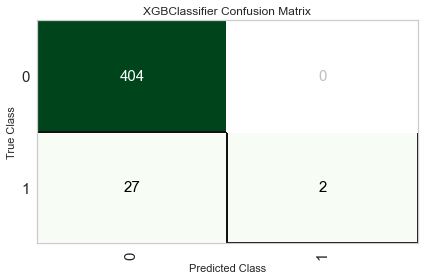

In [112]:
plot_model(clf_model_male_fear, plot='confusion_matrix')

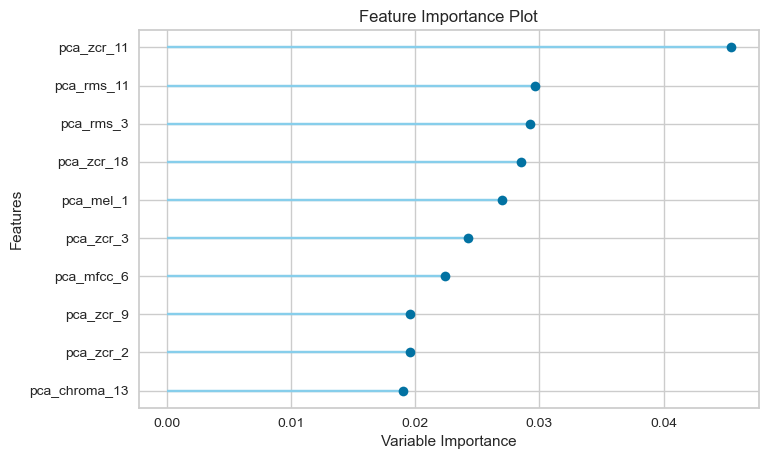

In [113]:
plot_model(clf_model_male_fear, plot = 'feature')

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

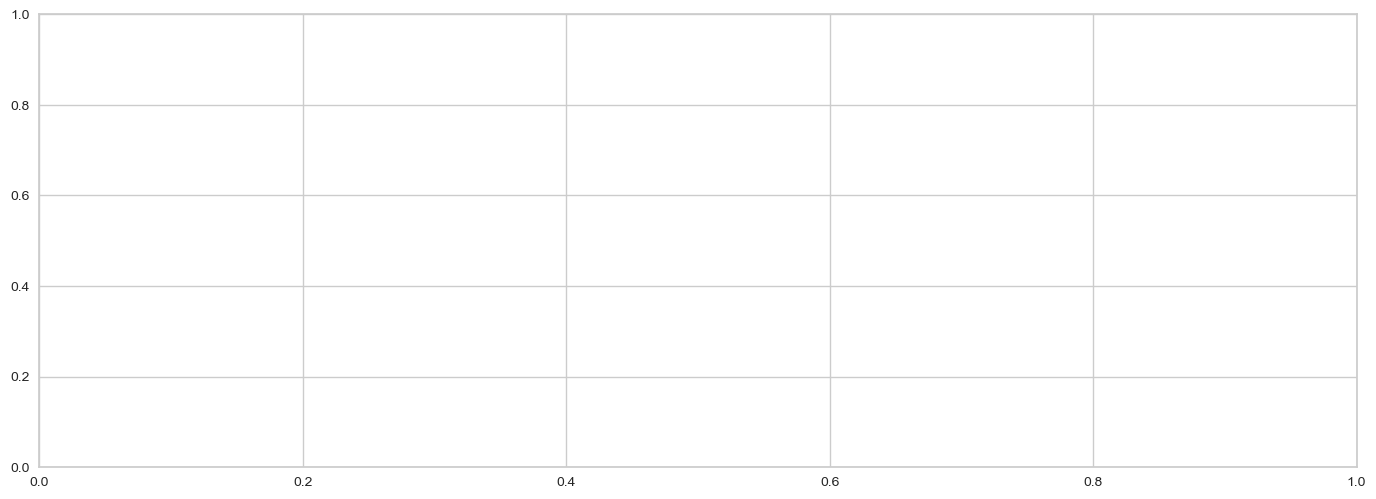

In [114]:
evaluate_model(clf_model_male_fear)

In [115]:
## NOW WE ARE CREATING A TRAIN AND TEST SPLIT 

setup(data = df_male_fear, target = 'male_fear', train_size = 0.7)

,Description,Value
0,Session id,555
1,Target,male_fear
2,Target type,Binary
3,Original data shape,"(1440, 119)"
4,Transformed data shape,"(1440, 119)"
5,Transformed train set shape,"(1007, 119)"
6,Transformed test set shape,"(433, 119)"
7,Numeric features,117
8,Categorical features,1
9,Preprocess,True


In [116]:
## TESTING THE MODEL 

clf_predict = predict_model(clf_model_male_fear)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Extreme Gradient Boosting,0.9838,0.9859,0.7586,1.0000,0.8627,0.8543,0.8635


In [117]:
## SAVING THE MODEL 
save_model(clf_model_male_fear, model_name = "best-model-male-fear")

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=FastMemory(location=C:\Users\Pankil\AppData\Local\Temp\joblib),
          steps=[('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['pca_mfcc_1', 'pca_mfcc_2',
                                              'pca_mfcc_3', 'pca_mfcc_4',
                                              'pca_mfcc_5', 'pca_mfcc_6',
                                              'pca_mfcc_7', 'pca_mfcc_8',
                                              'pca_mfcc_9', 'pca_mfcc_10',
                                              'pca_mfcc_11', 'pca_mfcc_12',
                                              'pca_mfcc_13', 'pca_mfcc_14',
                                              'pca_mfcc_15', '...
                                grow_policy=None, importance_type=None,
                                interaction_constraints=None, learning_rate=None,
                                max_bin=None, max_cat_threshold=None,
                

In [118]:
loaded_bestmodel_male_fear = load_model('best-model-male-fear')
print(loaded_bestmodel_male_fear)

Transformation Pipeline and Model Successfully Loaded
Pipeline(memory=FastMemory(location=C:\Users\Pankil\AppData\Local\Temp\joblib),
         steps=[('numerical_imputer',
                 TransformerWrapper(exclude=None,
                                    include=['pca_mfcc_1', 'pca_mfcc_2',
                                             'pca_mfcc_3', 'pca_mfcc_4',
                                             'pca_mfcc_5', 'pca_mfcc_6',
                                             'pca_mfcc_7', 'pca_mfcc_8',
                                             'pca_mfcc_9', 'pca_mfcc_10',
                                             'pca_mfcc_11', 'pca_mfcc_12',
                                             'pca_mfcc_13', 'pca_mfcc_14',
                                             'pca_mfcc_15', '...
                               grow_policy=None, importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, 

In [119]:
from sklearn import set_config
set_config(display = "diagram")
loaded_bestmodel_male_fear[0]

TransformerWrapper(exclude=None,
                   include=['pca_mfcc_1', 'pca_mfcc_2', 'pca_mfcc_3',
                            'pca_mfcc_4', 'pca_mfcc_5', 'pca_mfcc_6',
                            'pca_mfcc_7', 'pca_mfcc_8', 'pca_mfcc_9',
                            'pca_mfcc_10', 'pca_mfcc_11', 'pca_mfcc_12',
                            'pca_mfcc_13', 'pca_mfcc_14', 'pca_mfcc_15',
                            'pca_mfcc_16', 'pca_mfcc_17', 'pca_mfcc_18',
                            'pca_mfcc_19', 'pca_mfcc_20', 'pca_zcr_1',
                            'pca_zcr_2', 'pca_zcr_3', 'pca_zcr_4', 'pca_zcr_5',
                            'pca_zcr_6', 'pca_zcr_7', 'pca_zcr_8', 'pca_zcr_9',
                            'pca_zcr_10', ...],
                   transformer=SimpleImputer(add_indicator=False, copy=True,
                                             fill_value=None,
                                             missing_values=nan,
                                             strategy='mean', verbose=0))

## MODEL CREATION FOR MALE HAPPY 

In [120]:
df_male_happy = pd.read_csv("labels_oneHot_encoding.csv")

In [121]:
df_male_happy.head()

,Unnamed: 0,pca_mfcc_1,pca_mfcc_2,pca_mfcc_3,pca_mfcc_4,pca_mfcc_5,pca_mfcc_6,pca_mfcc_7,pca_mfcc_8,pca_mfcc_9,...,female_neutral,female_sad,female_surprise,male_angry,male_disgust,male_fear,male_happy,male_neutral,male_sad,male_surprise
0,0,-109.834097,0.053196,-1.713443,-3.768810,-12.706864,1.144180,-6.869531,2.593850,-1.156389,...,0,0,0,0,0,0,0,1,0,0
1,1,-105.048512,1.461942,-1.111467,-1.051186,-12.977316,0.638045,-7.102971,1.234032,-0.479727,...,0,0,0,0,0,0,0,1,0,0
2,2,-103.732876,1.979006,-0.234491,-3.120535,-11.674955,-2.359368,-4.729244,2.976227,-0.869942,...,0,0,0,0,0,0,0,1,0,0
3,3,-97.492362,3.365092,-3.041923,-4.759261,-11.648275,-1.808196,-4.129106,2.605237,-0.737542,...,0,0,0,0,0,0,0,1,0,0
4,4,-140.114314,2.689681,1.560070,-2.531609,-10.692509,-1.370026,-4.236870,3.824275,-1.028487,...,0,0,0,0,0,0,0,1,0,0


In [122]:
df_male_happy = df_male_happy.drop(columns = ["Unnamed: 0" , "angry" , "disgust" , "fear" , "happy" , "neutral" , "sad" , "surprise" , "gender" ,"female_disgust" , "female_fear" , "female_happy" , "female_neutral" , "female_sad" , "female_surprise",  "male_angry" ,"male_disgust" , "male_fear" , "female_angry" , "male_neutral" , "male_sad" , "male_surprise" , "path"] , axis = 1)

In [123]:
df_male_happy.head()

,pca_mfcc_1,pca_mfcc_2,pca_mfcc_3,pca_mfcc_4,pca_mfcc_5,pca_mfcc_6,pca_mfcc_7,pca_mfcc_8,pca_mfcc_9,pca_mfcc_10,...,pca_mel_12,pca_mel_13,pca_mel_14,pca_mel_15,pca_mel_16,pca_mel_17,pca_mel_18,pca_mel_19,pca_mel_20,male_happy
0,-109.834097,0.053196,-1.713443,-3.768810,-12.706864,1.144180,-6.869531,2.593850,-1.156389,-1.082873,...,-12.453682,-6.254424,-5.244198,-3.020359,-9.067628,-10.647145,-3.032349,3.813296,7.941038,0
1,-105.048512,1.461942,-1.111467,-1.051186,-12.977316,0.638045,-7.102971,1.234032,-0.479727,-2.553631,...,-12.452970,-6.266163,-5.224034,-3.035165,-9.063099,-10.686008,-3.056054,3.814217,7.981975,0
2,-103.732876,1.979006,-0.234491,-3.120535,-11.674955,-2.359368,-4.729244,2.976227,-0.869942,-2.645149,...,-12.400792,-6.201859,-4.932682,-3.051120,-9.003797,-10.594508,-2.948012,3.825954,7.939555,0
3,-97.492362,3.365092,-3.041923,-4.759261,-11.648275,-1.808196,-4.129106,2.605237,-0.737542,-2.380594,...,-12.388350,-6.240878,-5.088265,-3.072477,-9.064833,-10.652129,-3.076305,3.825014,7.970841,0
4,-140.114314,2.689681,1.560070,-2.531609,-10.692509,-1.370026,-4.236870,3.824275,-1.028487,-1.048890,...,-12.481865,-6.251930,-5.254000,-3.022376,-9.094775,-10.720101,-3.061291,3.846036,8.028451,0


In [124]:
df_male_happy['male_happy'].value_counts()

0    1344
1      96
Name: male_happy, dtype: int64

In [125]:
from pycaret.classification import *
clf = setup(data = df_male_happy, target = 'male_happy')

,Description,Value
0,Session id,5074
1,Target,male_happy
2,Target type,Binary
3,Original data shape,"(1440, 119)"
4,Transformed data shape,"(1440, 119)"
5,Transformed train set shape,"(1007, 119)"
6,Transformed test set shape,"(433, 119)"
7,Numeric features,117
8,Categorical features,1
9,Preprocess,True


In [126]:
## COMAPRING MODELs

## TRAINING 

best = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
xgboost,Extreme Gradient Boosting,0.9394,0.8746,0.1190,0.6167,0.1936,0.1821,0.2540,4.8840
gbc,Gradient Boosting Classifier,0.9345,0.8294,0.0714,0.2167,0.1014,0.0923,0.1097,5.1890
knn,K Neighbors Classifier,0.9335,0.7545,0.1024,0.4167,0.1602,0.1433,0.1851,4.7820
rf,Random Forest Classifier,0.9335,0.7944,0.0000,0.0000,0.0000,0.0000,0.0000,5.0630
qda,Quadratic Discriminant Analysis,0.9335,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000,5.0580
et,Extra Trees Classifier,0.9335,0.8322,0.0000,0.0000,0.0000,0.0000,0.0000,4.9130
lightgbm,Light Gradient Boosting Machine,0.9335,0.8681,0.0143,0.1000,0.0250,0.0219,0.0341,4.5890
dummy,Dummy Classifier,0.9335,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000,5.2460
ada,Ada Boost Classifier,0.9305,0.8541,0.2690,0.5095,0.3259,0.2947,0.3219,5.0600
ridge,Ridge Classifier,0.9295,0.0000,0.0167,0.1000,0.0286,0.0189,0.0279,4.9610


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

In [127]:
print(best)

XGBClassifier(base_score=None, booster='gbtree', callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=-1, num_parallel_tree=None,
              objective='binary:logistic', predictor=None, ...)


In [128]:
## NOW WE ARE CREATING THE MODEL 
clf_model_male_happy = create_model('xgboost')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9406,0.8921,0.2857,0.6667,0.4000,0.3740,0.4115
1,0.9406,0.8617,0.1429,1.0000,0.2500,0.2368,0.3665
2,0.9307,0.7933,0.0000,0.0000,0.0000,0.0000,0.0000
3,0.9406,0.8875,0.1429,1.0000,0.2500,0.2368,0.3665
4,0.9307,0.9392,0.0000,0.0000,0.0000,0.0000,0.0000
5,0.9406,0.8860,0.1429,1.0000,0.2500,0.2368,0.3665
6,0.9406,0.8784,0.1429,1.0000,0.2500,0.2368,0.3665
7,0.9400,0.7624,0.0000,0.0000,0.0000,0.0000,0.0000
8,0.9500,0.9362,0.1667,1.0000,0.2857,0.2733,0.3978


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

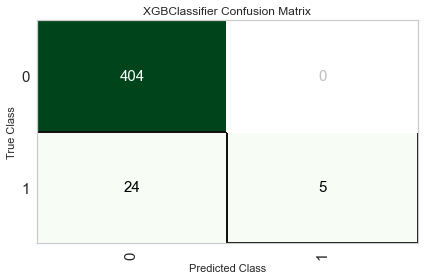

In [129]:
plot_model(clf_model_male_happy, plot='confusion_matrix')

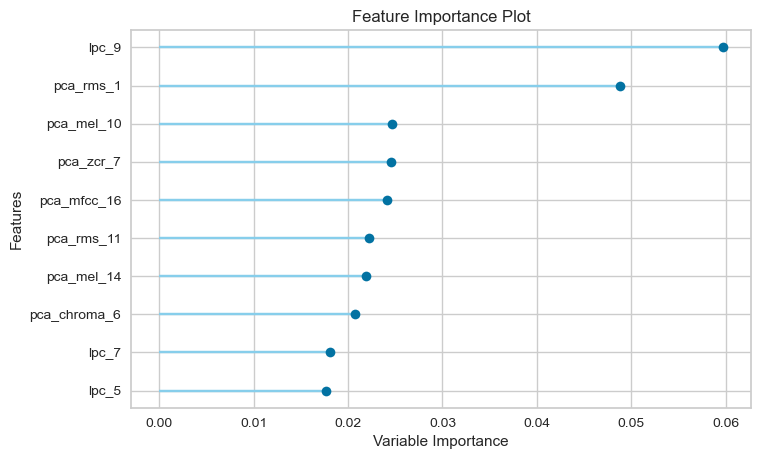

In [130]:
plot_model(clf_model_male_happy, plot = 'feature')

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

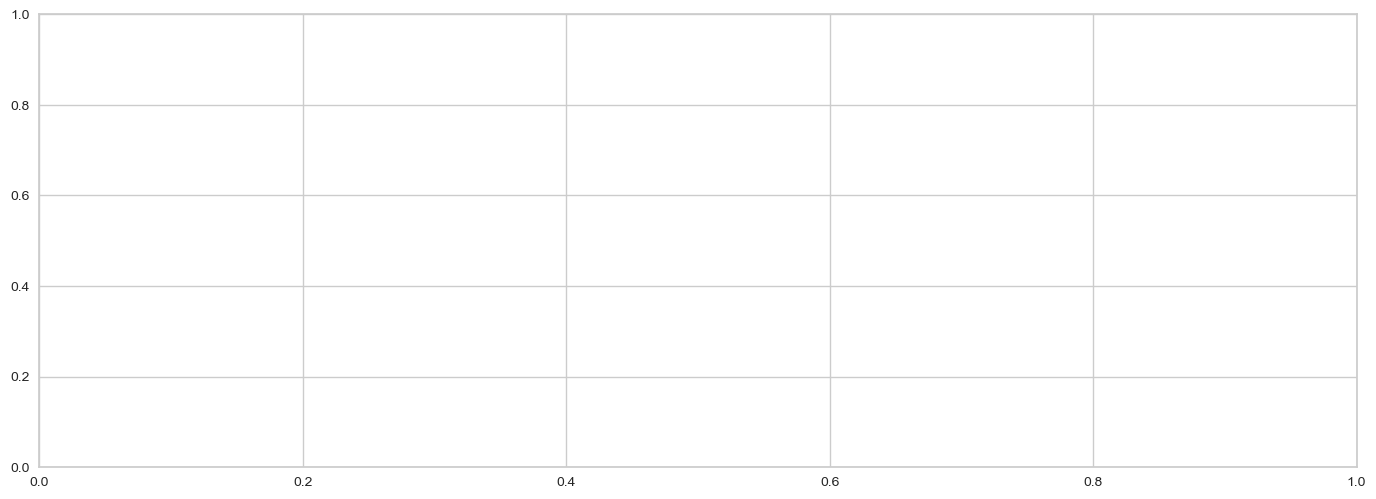

In [131]:
evaluate_model(clf_model_male_happy)

In [132]:
## NOW WE ARE CREATING A TRAIN AND TEST SPLIT 

setup(data = df_male_happy, target = 'male_happy', train_size = 0.7)

,Description,Value
0,Session id,970
1,Target,male_happy
2,Target type,Binary
3,Original data shape,"(1440, 119)"
4,Transformed data shape,"(1440, 119)"
5,Transformed train set shape,"(1007, 119)"
6,Transformed test set shape,"(433, 119)"
7,Numeric features,117
8,Categorical features,1
9,Preprocess,True


In [133]:
## TESTING THE MODEL 

clf_predict = predict_model(clf_model_male_happy)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Extreme Gradient Boosting,0.9815,0.9905,0.7241,1.0000,0.8400,0.8305,0.8427


In [134]:
## SAVING THE MODEL 
save_model(clf_model_male_happy, model_name = "best-model-male-happy")

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=FastMemory(location=C:\Users\Pankil\AppData\Local\Temp\joblib),
          steps=[('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['pca_mfcc_1', 'pca_mfcc_2',
                                              'pca_mfcc_3', 'pca_mfcc_4',
                                              'pca_mfcc_5', 'pca_mfcc_6',
                                              'pca_mfcc_7', 'pca_mfcc_8',
                                              'pca_mfcc_9', 'pca_mfcc_10',
                                              'pca_mfcc_11', 'pca_mfcc_12',
                                              'pca_mfcc_13', 'pca_mfcc_14',
                                              'pca_mfcc_15', '...
                                grow_policy=None, importance_type=None,
                                interaction_constraints=None, learning_rate=None,
                                max_bin=None, max_cat_threshold=None,
                

In [135]:
loaded_bestmodel_male_happy = load_model('best-model-male-happy')
print(loaded_bestmodel_male_happy)

Transformation Pipeline and Model Successfully Loaded
Pipeline(memory=FastMemory(location=C:\Users\Pankil\AppData\Local\Temp\joblib),
         steps=[('numerical_imputer',
                 TransformerWrapper(exclude=None,
                                    include=['pca_mfcc_1', 'pca_mfcc_2',
                                             'pca_mfcc_3', 'pca_mfcc_4',
                                             'pca_mfcc_5', 'pca_mfcc_6',
                                             'pca_mfcc_7', 'pca_mfcc_8',
                                             'pca_mfcc_9', 'pca_mfcc_10',
                                             'pca_mfcc_11', 'pca_mfcc_12',
                                             'pca_mfcc_13', 'pca_mfcc_14',
                                             'pca_mfcc_15', '...
                               grow_policy=None, importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, 

In [136]:
from sklearn import set_config
set_config(display = "diagram")
loaded_bestmodel_male_happy[0]

TransformerWrapper(exclude=None,
                   include=['pca_mfcc_1', 'pca_mfcc_2', 'pca_mfcc_3',
                            'pca_mfcc_4', 'pca_mfcc_5', 'pca_mfcc_6',
                            'pca_mfcc_7', 'pca_mfcc_8', 'pca_mfcc_9',
                            'pca_mfcc_10', 'pca_mfcc_11', 'pca_mfcc_12',
                            'pca_mfcc_13', 'pca_mfcc_14', 'pca_mfcc_15',
                            'pca_mfcc_16', 'pca_mfcc_17', 'pca_mfcc_18',
                            'pca_mfcc_19', 'pca_mfcc_20', 'pca_zcr_1',
                            'pca_zcr_2', 'pca_zcr_3', 'pca_zcr_4', 'pca_zcr_5',
                            'pca_zcr_6', 'pca_zcr_7', 'pca_zcr_8', 'pca_zcr_9',
                            'pca_zcr_10', ...],
                   transformer=SimpleImputer(add_indicator=False, copy=True,
                                             fill_value=None,
                                             missing_values=nan,
                                             strategy='mean', verbose=0))

## MODEL CREATION FOR MALE NEUTRAL

In [2]:
import pandas as pd 
import numpy as np


df_male_neutral = pd.read_csv("labels_oneHot_encoding.csv")

In [3]:
df_male_neutral.head()

,Unnamed: 0,pca_mfcc_1,pca_mfcc_2,pca_mfcc_3,pca_mfcc_4,pca_mfcc_5,pca_mfcc_6,pca_mfcc_7,pca_mfcc_8,pca_mfcc_9,...,female_neutral,female_sad,female_surprise,male_angry,male_disgust,male_fear,male_happy,male_neutral,male_sad,male_surprise
0,0,-109.834097,0.053196,-1.713443,-3.768810,-12.706864,1.144180,-6.869531,2.593850,-1.156389,...,0,0,0,0,0,0,0,1,0,0
1,1,-105.048512,1.461942,-1.111467,-1.051186,-12.977316,0.638045,-7.102971,1.234032,-0.479727,...,0,0,0,0,0,0,0,1,0,0
2,2,-103.732876,1.979006,-0.234491,-3.120535,-11.674955,-2.359368,-4.729244,2.976227,-0.869942,...,0,0,0,0,0,0,0,1,0,0
3,3,-97.492362,3.365092,-3.041923,-4.759261,-11.648275,-1.808196,-4.129106,2.605237,-0.737542,...,0,0,0,0,0,0,0,1,0,0
4,4,-140.114314,2.689681,1.560070,-2.531609,-10.692509,-1.370026,-4.236870,3.824275,-1.028487,...,0,0,0,0,0,0,0,1,0,0


In [4]:
df_male_neutral = df_male_neutral.drop(columns = ["Unnamed: 0" , "angry" , "disgust" , "fear" , "happy" , "neutral" , "sad" , "surprise" , "gender" ,"female_disgust" , "female_fear" , "female_happy" , "female_neutral" , "female_sad" , "female_surprise",  "male_angry" ,"male_disgust" , "male_fear" , "male_happy" , "female_angry" , "male_sad" , "male_surprise" , "path"] , axis = 1)

In [5]:
df_male_neutral.head()

,pca_mfcc_1,pca_mfcc_2,pca_mfcc_3,pca_mfcc_4,pca_mfcc_5,pca_mfcc_6,pca_mfcc_7,pca_mfcc_8,pca_mfcc_9,pca_mfcc_10,...,pca_mel_12,pca_mel_13,pca_mel_14,pca_mel_15,pca_mel_16,pca_mel_17,pca_mel_18,pca_mel_19,pca_mel_20,male_neutral
0,-109.834097,0.053196,-1.713443,-3.768810,-12.706864,1.144180,-6.869531,2.593850,-1.156389,-1.082873,...,-12.453682,-6.254424,-5.244198,-3.020359,-9.067628,-10.647145,-3.032349,3.813296,7.941038,1
1,-105.048512,1.461942,-1.111467,-1.051186,-12.977316,0.638045,-7.102971,1.234032,-0.479727,-2.553631,...,-12.452970,-6.266163,-5.224034,-3.035165,-9.063099,-10.686008,-3.056054,3.814217,7.981975,1
2,-103.732876,1.979006,-0.234491,-3.120535,-11.674955,-2.359368,-4.729244,2.976227,-0.869942,-2.645149,...,-12.400792,-6.201859,-4.932682,-3.051120,-9.003797,-10.594508,-2.948012,3.825954,7.939555,1
3,-97.492362,3.365092,-3.041923,-4.759261,-11.648275,-1.808196,-4.129106,2.605237,-0.737542,-2.380594,...,-12.388350,-6.240878,-5.088265,-3.072477,-9.064833,-10.652129,-3.076305,3.825014,7.970841,1
4,-140.114314,2.689681,1.560070,-2.531609,-10.692509,-1.370026,-4.236870,3.824275,-1.028487,-1.048890,...,-12.481865,-6.251930,-5.254000,-3.022376,-9.094775,-10.720101,-3.061291,3.846036,8.028451,1


In [6]:
df_male_neutral['male_neutral'].value_counts()

0    1296
1     144
Name: male_neutral, dtype: int64

In [7]:
from pycaret.classification import *
clf = setup(data = df_male_neutral, target = 'male_neutral')

,Description,Value
0,Session id,817
1,Target,male_neutral
2,Target type,Binary
3,Original data shape,"(1440, 119)"
4,Transformed data shape,"(1440, 119)"
5,Transformed train set shape,"(1007, 119)"
6,Transformed test set shape,"(433, 119)"
7,Numeric features,117
8,Categorical features,1
9,Preprocess,True


In [8]:
## COMAPRING MODELs

## TRAINING 

best = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.9344,0.9656,0.5736,0.7460,0.6289,0.5946,0.6112,5.4110
knn,K Neighbors Classifier,0.9315,0.9595,0.7427,0.6413,0.6858,0.6478,0.6515,5.8100
xgboost,Extreme Gradient Boosting,0.9315,0.9662,0.5564,0.7262,0.6088,0.5732,0.5905,5.5150
lr,Logistic Regression,0.9285,0.9526,0.7209,0.6411,0.6637,0.6250,0.6350,6.3610
gbc,Gradient Boosting Classifier,0.9285,0.9576,0.4555,0.7598,0.5549,0.5197,0.5471,5.7440
ridge,Ridge Classifier,0.9255,0.0000,0.4255,0.7334,0.5279,0.4914,0.5181,5.2600
ada,Ada Boost Classifier,0.9255,0.9408,0.5836,0.6768,0.6127,0.5724,0.5822,4.9670
lda,Linear Discriminant Analysis,0.9186,0.9582,0.8109,0.5741,0.6666,0.6222,0.6379,5.9990
rf,Random Forest Classifier,0.9156,0.9545,0.1900,0.7167,0.2913,0.2703,0.3404,5.4950
et,Extra Trees Classifier,0.9146,0.9681,0.1482,0.9000,0.2520,0.2337,0.3455,6.2120


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

In [9]:
print(best)

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=817, reg_alpha=0.0, reg_lambda=0.0, silent='warn',
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)


In [10]:
## NOW WE ARE CREATING THE MODEL 
clf_model_male_neutral = create_model('lightgbm')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9406,0.9736,0.9000,0.6429,0.7500,0.7174,0.7304
1,0.9406,0.9890,0.6000,0.7500,0.6667,0.6345,0.6393
2,0.9703,0.9879,0.8000,0.8889,0.8421,0.8258,0.8272
3,0.9406,0.9626,0.4000,1.0000,0.5714,0.5457,0.6126
4,0.9208,0.9648,0.4000,0.6667,0.5000,0.4599,0.4776
5,0.9010,0.9626,0.5000,0.5000,0.5000,0.4451,0.4451
6,0.9406,0.9848,0.6364,0.7778,0.7000,0.6674,0.6715
7,0.9300,0.9511,0.4000,0.8000,0.5333,0.5000,0.5353
8,0.9400,0.9433,0.5000,0.8333,0.6250,0.5946,0.6176


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

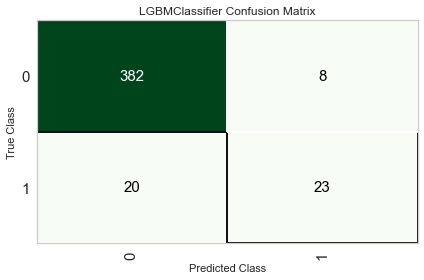

In [11]:
plot_model(clf_model_male_neutral, plot='confusion_matrix')

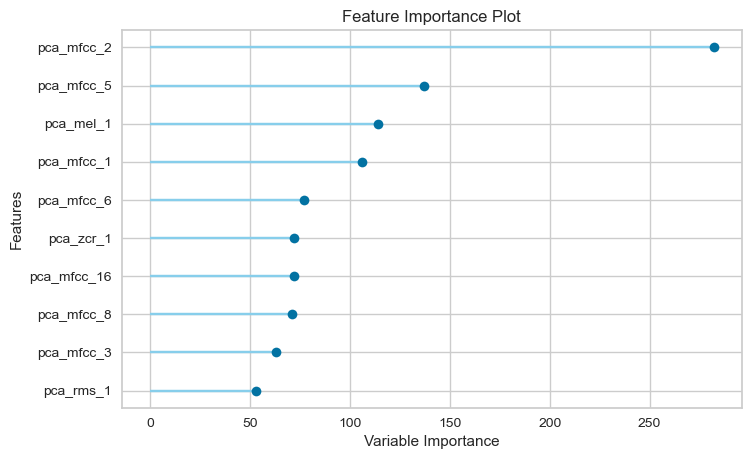

In [12]:
plot_model(clf_model_male_neutral, plot = 'feature')

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

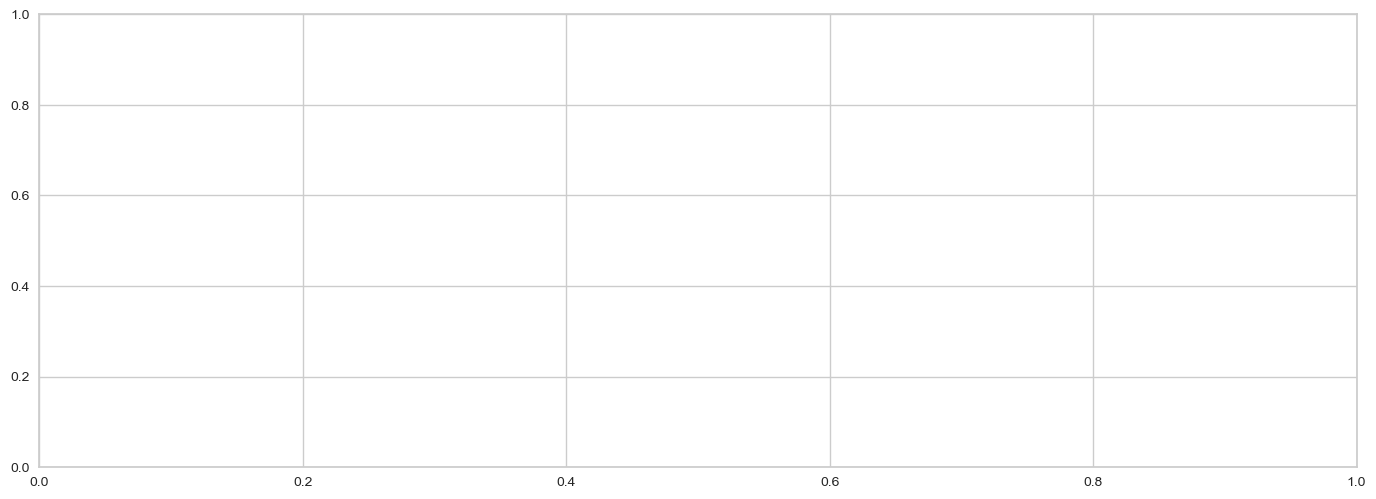

In [13]:
evaluate_model(clf_model_male_neutral)

In [14]:
## NOW WE ARE CREATING A TRAIN AND TEST SPLIT 

setup(data = df_male_neutral, target = 'male_neutral', train_size = 0.7)

,Description,Value
0,Session id,2692
1,Target,male_neutral
2,Target type,Binary
3,Original data shape,"(1440, 119)"
4,Transformed data shape,"(1440, 119)"
5,Transformed train set shape,"(1007, 119)"
6,Transformed test set shape,"(433, 119)"
7,Numeric features,117
8,Categorical features,1
9,Preprocess,True


In [15]:
## TESTING THE MODEL 

clf_predict = predict_model(clf_model_male_neutral)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Light Gradient Boosting Machine,0.9861,0.9971,0.9302,0.9302,0.9302,0.9225,0.9225


In [16]:
## SAVING THE MODEL 
save_model(clf_model_male_neutral, model_name = "best-model-male-neutral")

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=FastMemory(location=C:\Users\Pankil\AppData\Local\Temp\joblib),
          steps=[('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['pca_mfcc_1', 'pca_mfcc_2',
                                              'pca_mfcc_3', 'pca_mfcc_4',
                                              'pca_mfcc_5', 'pca_mfcc_6',
                                              'pca_mfcc_7', 'pca_mfcc_8',
                                              'pca_mfcc_9', 'pca_mfcc_10',
                                              'pca_mfcc_11', 'pca_mfcc_12',
                                              'pca_mfcc_13', 'pca_mfcc_14',
                                              'pca_mfcc_15', '...
                  LGBMClassifier(boosting_type='gbdt', class_weight=None,
                                 colsample_bytree=1.0, importance_type='split',
                                 learning_rate=0.1, max_depth=-1,
                    

In [17]:
loaded_bestmodel_male_neutral = load_model('best-model-male-neutral')
print(loaded_bestmodel_male_neutral)

Transformation Pipeline and Model Successfully Loaded
Pipeline(memory=FastMemory(location=C:\Users\Pankil\AppData\Local\Temp\joblib),
         steps=[('numerical_imputer',
                 TransformerWrapper(exclude=None,
                                    include=['pca_mfcc_1', 'pca_mfcc_2',
                                             'pca_mfcc_3', 'pca_mfcc_4',
                                             'pca_mfcc_5', 'pca_mfcc_6',
                                             'pca_mfcc_7', 'pca_mfcc_8',
                                             'pca_mfcc_9', 'pca_mfcc_10',
                                             'pca_mfcc_11', 'pca_mfcc_12',
                                             'pca_mfcc_13', 'pca_mfcc_14',
                                             'pca_mfcc_15', '...
                 LGBMClassifier(boosting_type='gbdt', class_weight=None,
                                colsample_bytree=1.0, importance_type='split',
                                learning_rate

In [18]:
from sklearn import set_config
set_config(display = "diagram")
loaded_bestmodel_male_neutral[0]

TransformerWrapper(exclude=None,
                   include=['pca_mfcc_1', 'pca_mfcc_2', 'pca_mfcc_3',
                            'pca_mfcc_4', 'pca_mfcc_5', 'pca_mfcc_6',
                            'pca_mfcc_7', 'pca_mfcc_8', 'pca_mfcc_9',
                            'pca_mfcc_10', 'pca_mfcc_11', 'pca_mfcc_12',
                            'pca_mfcc_13', 'pca_mfcc_14', 'pca_mfcc_15',
                            'pca_mfcc_16', 'pca_mfcc_17', 'pca_mfcc_18',
                            'pca_mfcc_19', 'pca_mfcc_20', 'pca_zcr_1',
                            'pca_zcr_2', 'pca_zcr_3', 'pca_zcr_4', 'pca_zcr_5',
                            'pca_zcr_6', 'pca_zcr_7', 'pca_zcr_8', 'pca_zcr_9',
                            'pca_zcr_10', ...],
                   transformer=SimpleImputer(add_indicator=False, copy=True,
                                             fill_value=None,
                                             missing_values=nan,
                                             strategy='mean', verbose=0))

## MODEL CREATION FOR MALE SAD

In [19]:
df_male_sad = pd.read_csv("labels_oneHot_encoding.csv")

In [20]:
df_male_sad.head()

,Unnamed: 0,pca_mfcc_1,pca_mfcc_2,pca_mfcc_3,pca_mfcc_4,pca_mfcc_5,pca_mfcc_6,pca_mfcc_7,pca_mfcc_8,pca_mfcc_9,...,female_neutral,female_sad,female_surprise,male_angry,male_disgust,male_fear,male_happy,male_neutral,male_sad,male_surprise
0,0,-109.834097,0.053196,-1.713443,-3.768810,-12.706864,1.144180,-6.869531,2.593850,-1.156389,...,0,0,0,0,0,0,0,1,0,0
1,1,-105.048512,1.461942,-1.111467,-1.051186,-12.977316,0.638045,-7.102971,1.234032,-0.479727,...,0,0,0,0,0,0,0,1,0,0
2,2,-103.732876,1.979006,-0.234491,-3.120535,-11.674955,-2.359368,-4.729244,2.976227,-0.869942,...,0,0,0,0,0,0,0,1,0,0
3,3,-97.492362,3.365092,-3.041923,-4.759261,-11.648275,-1.808196,-4.129106,2.605237,-0.737542,...,0,0,0,0,0,0,0,1,0,0
4,4,-140.114314,2.689681,1.560070,-2.531609,-10.692509,-1.370026,-4.236870,3.824275,-1.028487,...,0,0,0,0,0,0,0,1,0,0


In [21]:
df_male_sad = df_male_sad.drop(columns = ["Unnamed: 0" , "angry" , "disgust" , "fear" , "happy" , "neutral" , "sad" , "surprise" , "gender" ,"female_disgust" , "female_fear" , "female_happy" , "female_neutral" , "female_sad" , "female_surprise",  "male_angry" ,"male_disgust" , "male_fear" , "male_happy" , "male_neutral" , "female_angry" , "male_surprise" , "path"] , axis = 1)

In [22]:
df_male_sad.head()

,pca_mfcc_1,pca_mfcc_2,pca_mfcc_3,pca_mfcc_4,pca_mfcc_5,pca_mfcc_6,pca_mfcc_7,pca_mfcc_8,pca_mfcc_9,pca_mfcc_10,...,pca_mel_12,pca_mel_13,pca_mel_14,pca_mel_15,pca_mel_16,pca_mel_17,pca_mel_18,pca_mel_19,pca_mel_20,male_sad
0,-109.834097,0.053196,-1.713443,-3.768810,-12.706864,1.144180,-6.869531,2.593850,-1.156389,-1.082873,...,-12.453682,-6.254424,-5.244198,-3.020359,-9.067628,-10.647145,-3.032349,3.813296,7.941038,0
1,-105.048512,1.461942,-1.111467,-1.051186,-12.977316,0.638045,-7.102971,1.234032,-0.479727,-2.553631,...,-12.452970,-6.266163,-5.224034,-3.035165,-9.063099,-10.686008,-3.056054,3.814217,7.981975,0
2,-103.732876,1.979006,-0.234491,-3.120535,-11.674955,-2.359368,-4.729244,2.976227,-0.869942,-2.645149,...,-12.400792,-6.201859,-4.932682,-3.051120,-9.003797,-10.594508,-2.948012,3.825954,7.939555,0
3,-97.492362,3.365092,-3.041923,-4.759261,-11.648275,-1.808196,-4.129106,2.605237,-0.737542,-2.380594,...,-12.388350,-6.240878,-5.088265,-3.072477,-9.064833,-10.652129,-3.076305,3.825014,7.970841,0
4,-140.114314,2.689681,1.560070,-2.531609,-10.692509,-1.370026,-4.236870,3.824275,-1.028487,-1.048890,...,-12.481865,-6.251930,-5.254000,-3.022376,-9.094775,-10.720101,-3.061291,3.846036,8.028451,0


In [23]:
df_male_sad['male_sad'].value_counts()

0    1344
1      96
Name: male_sad, dtype: int64

In [24]:
from pycaret.classification import *
clf = setup(data = df_male_sad, target = 'male_sad')

,Description,Value
0,Session id,2319
1,Target,male_sad
2,Target type,Binary
3,Original data shape,"(1440, 119)"
4,Transformed data shape,"(1440, 119)"
5,Transformed train set shape,"(1007, 119)"
6,Transformed test set shape,"(433, 119)"
7,Numeric features,117
8,Categorical features,1
9,Preprocess,True


In [25]:
## COMAPRING MODELs

## TRAINING 

best = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
xgboost,Extreme Gradient Boosting,0.9365,0.8418,0.0619,0.4000,0.1071,0.1002,0.1501,5.4050
rf,Random Forest Classifier,0.9335,0.7969,0.0000,0.0000,0.0000,0.0000,0.0000,5.3010
qda,Quadratic Discriminant Analysis,0.9335,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000,5.4290
gbc,Gradient Boosting Classifier,0.9335,0.8171,0.0595,0.3250,0.0968,0.0868,0.1248,6.0090
et,Extra Trees Classifier,0.9335,0.8420,0.0000,0.0000,0.0000,0.0000,0.0000,5.1770
dummy,Dummy Classifier,0.9335,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000,5.2930
lightgbm,Light Gradient Boosting Machine,0.9305,0.8814,0.0143,0.0333,0.0200,0.0130,0.0131,5.2480
knn,K Neighbors Classifier,0.9265,0.7839,0.0310,0.0833,0.0450,0.0293,0.0316,4.9730
ridge,Ridge Classifier,0.9265,0.0000,0.0000,0.0000,0.0000,-0.0120,-0.0171,5.3660
ada,Ada Boost Classifier,0.9136,0.8270,0.1786,0.2512,0.2005,0.1599,0.1651,7.0330


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

In [26]:
print(best)

XGBClassifier(base_score=None, booster='gbtree', callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=-1, num_parallel_tree=None,
              objective='binary:logistic', predictor=None, ...)


In [27]:
## NOW WE ARE CREATING THE MODEL 
clf_model_male_sad = create_model('xgboost')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9406,0.8678,0.1429,1.0000,0.2500,0.2368,0.3665
1,0.9307,0.8982,0.0000,0.0000,0.0000,0.0000,0.0000
2,0.9307,0.8693,0.0000,0.0000,0.0000,0.0000,0.0000
3,0.9406,0.9210,0.1429,1.0000,0.2500,0.2368,0.3665
4,0.9208,0.7234,0.0000,0.0000,0.0000,-0.0176,-0.0273
5,0.9307,0.7173,0.0000,0.0000,0.0000,0.0000,0.0000
6,0.9307,0.8587,0.0000,0.0000,0.0000,0.0000,0.0000
7,0.9500,0.8812,0.1667,1.0000,0.2857,0.2733,0.3978
8,0.9500,0.9043,0.1667,1.0000,0.2857,0.2733,0.3978


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

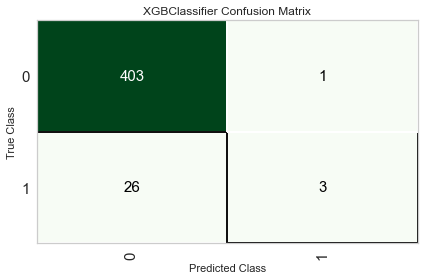

In [28]:
plot_model(clf_model_male_sad, plot='confusion_matrix')

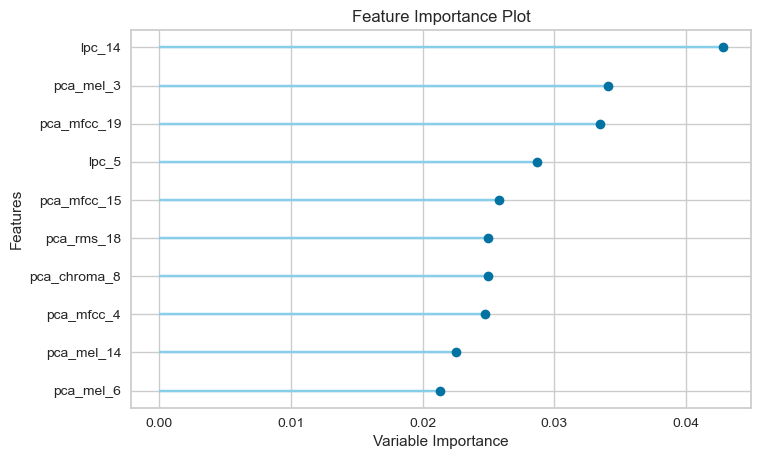

In [29]:
plot_model(clf_model_male_sad, plot = 'feature')

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

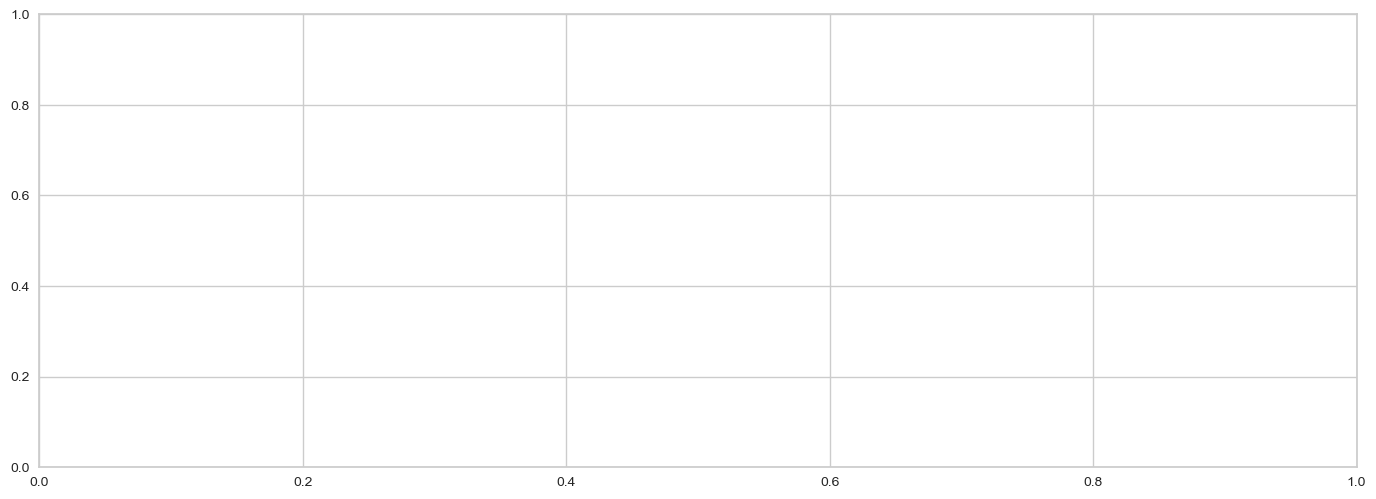

In [30]:
evaluate_model(clf_model_male_sad)

In [31]:
## NOW WE ARE CREATING A TRAIN AND TEST SPLIT 

setup(data = df_male_sad, target = 'male_sad', train_size = 0.7)

,Description,Value
0,Session id,1461
1,Target,male_sad
2,Target type,Binary
3,Original data shape,"(1440, 119)"
4,Transformed data shape,"(1440, 119)"
5,Transformed train set shape,"(1007, 119)"
6,Transformed test set shape,"(433, 119)"
7,Numeric features,117
8,Categorical features,1
9,Preprocess,True


In [32]:
## TESTING THE MODEL 

clf_predict = predict_model(clf_model_male_sad)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Extreme Gradient Boosting,0.9792,0.9799,0.6897,1.0000,0.8163,0.8057,0.8214


In [33]:
## SAVING THE MODEL 
save_model(clf_model_male_sad, model_name = "best-model-male-sad")

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=FastMemory(location=C:\Users\Pankil\AppData\Local\Temp\joblib),
          steps=[('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['pca_mfcc_1', 'pca_mfcc_2',
                                              'pca_mfcc_3', 'pca_mfcc_4',
                                              'pca_mfcc_5', 'pca_mfcc_6',
                                              'pca_mfcc_7', 'pca_mfcc_8',
                                              'pca_mfcc_9', 'pca_mfcc_10',
                                              'pca_mfcc_11', 'pca_mfcc_12',
                                              'pca_mfcc_13', 'pca_mfcc_14',
                                              'pca_mfcc_15', '...
                                grow_policy=None, importance_type=None,
                                interaction_constraints=None, learning_rate=None,
                                max_bin=None, max_cat_threshold=None,
                

In [34]:
loaded_bestmodel_male_sad = load_model('best-model-male-sad')
print(loaded_bestmodel_male_sad)

Transformation Pipeline and Model Successfully Loaded
Pipeline(memory=FastMemory(location=C:\Users\Pankil\AppData\Local\Temp\joblib),
         steps=[('numerical_imputer',
                 TransformerWrapper(exclude=None,
                                    include=['pca_mfcc_1', 'pca_mfcc_2',
                                             'pca_mfcc_3', 'pca_mfcc_4',
                                             'pca_mfcc_5', 'pca_mfcc_6',
                                             'pca_mfcc_7', 'pca_mfcc_8',
                                             'pca_mfcc_9', 'pca_mfcc_10',
                                             'pca_mfcc_11', 'pca_mfcc_12',
                                             'pca_mfcc_13', 'pca_mfcc_14',
                                             'pca_mfcc_15', '...
                               grow_policy=None, importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, 

In [35]:
from sklearn import set_config
set_config(display = "diagram")
loaded_bestmodel_male_sad[0]

TransformerWrapper(exclude=None,
                   include=['pca_mfcc_1', 'pca_mfcc_2', 'pca_mfcc_3',
                            'pca_mfcc_4', 'pca_mfcc_5', 'pca_mfcc_6',
                            'pca_mfcc_7', 'pca_mfcc_8', 'pca_mfcc_9',
                            'pca_mfcc_10', 'pca_mfcc_11', 'pca_mfcc_12',
                            'pca_mfcc_13', 'pca_mfcc_14', 'pca_mfcc_15',
                            'pca_mfcc_16', 'pca_mfcc_17', 'pca_mfcc_18',
                            'pca_mfcc_19', 'pca_mfcc_20', 'pca_zcr_1',
                            'pca_zcr_2', 'pca_zcr_3', 'pca_zcr_4', 'pca_zcr_5',
                            'pca_zcr_6', 'pca_zcr_7', 'pca_zcr_8', 'pca_zcr_9',
                            'pca_zcr_10', ...],
                   transformer=SimpleImputer(add_indicator=False, copy=True,
                                             fill_value=None,
                                             missing_values=nan,
                                             strategy='mean', verbose=0))

## MODEL CREATION FOR MALE SURPRISE

In [1]:
import pandas as pd
import numpy as np

df_male_surprise = pd.read_csv("labels_oneHot_encoding.csv")

In [2]:
df_male_surprise.head()

,Unnamed: 0,pca_mfcc_1,pca_mfcc_2,pca_mfcc_3,pca_mfcc_4,pca_mfcc_5,pca_mfcc_6,pca_mfcc_7,pca_mfcc_8,pca_mfcc_9,...,female_neutral,female_sad,female_surprise,male_angry,male_disgust,male_fear,male_happy,male_neutral,male_sad,male_surprise
0,0,-109.834097,0.053196,-1.713443,-3.768810,-12.706864,1.144180,-6.869531,2.593850,-1.156389,...,0,0,0,0,0,0,0,1,0,0
1,1,-105.048512,1.461942,-1.111467,-1.051186,-12.977316,0.638045,-7.102971,1.234032,-0.479727,...,0,0,0,0,0,0,0,1,0,0
2,2,-103.732876,1.979006,-0.234491,-3.120535,-11.674955,-2.359368,-4.729244,2.976227,-0.869942,...,0,0,0,0,0,0,0,1,0,0
3,3,-97.492362,3.365092,-3.041923,-4.759261,-11.648275,-1.808196,-4.129106,2.605237,-0.737542,...,0,0,0,0,0,0,0,1,0,0
4,4,-140.114314,2.689681,1.560070,-2.531609,-10.692509,-1.370026,-4.236870,3.824275,-1.028487,...,0,0,0,0,0,0,0,1,0,0


In [3]:
df_male_surprise = df_male_surprise.drop(columns = ["Unnamed: 0" , "angry" , "disgust" , "fear" , "happy" , "neutral" , "sad" , "surprise" , "gender" ,"female_disgust" , "female_fear" , "female_happy" , "female_neutral" , "female_sad" , "female_surprise",  "male_angry" ,"male_disgust" , "male_fear" , "male_happy" , "male_neutral" , "male_sad" , "female_angry" , "path"] , axis = 1)

In [4]:
df_male_surprise.head()

,pca_mfcc_1,pca_mfcc_2,pca_mfcc_3,pca_mfcc_4,pca_mfcc_5,pca_mfcc_6,pca_mfcc_7,pca_mfcc_8,pca_mfcc_9,pca_mfcc_10,...,pca_mel_12,pca_mel_13,pca_mel_14,pca_mel_15,pca_mel_16,pca_mel_17,pca_mel_18,pca_mel_19,pca_mel_20,male_surprise
0,-109.834097,0.053196,-1.713443,-3.768810,-12.706864,1.144180,-6.869531,2.593850,-1.156389,-1.082873,...,-12.453682,-6.254424,-5.244198,-3.020359,-9.067628,-10.647145,-3.032349,3.813296,7.941038,0
1,-105.048512,1.461942,-1.111467,-1.051186,-12.977316,0.638045,-7.102971,1.234032,-0.479727,-2.553631,...,-12.452970,-6.266163,-5.224034,-3.035165,-9.063099,-10.686008,-3.056054,3.814217,7.981975,0
2,-103.732876,1.979006,-0.234491,-3.120535,-11.674955,-2.359368,-4.729244,2.976227,-0.869942,-2.645149,...,-12.400792,-6.201859,-4.932682,-3.051120,-9.003797,-10.594508,-2.948012,3.825954,7.939555,0
3,-97.492362,3.365092,-3.041923,-4.759261,-11.648275,-1.808196,-4.129106,2.605237,-0.737542,-2.380594,...,-12.388350,-6.240878,-5.088265,-3.072477,-9.064833,-10.652129,-3.076305,3.825014,7.970841,0
4,-140.114314,2.689681,1.560070,-2.531609,-10.692509,-1.370026,-4.236870,3.824275,-1.028487,-1.048890,...,-12.481865,-6.251930,-5.254000,-3.022376,-9.094775,-10.720101,-3.061291,3.846036,8.028451,0


In [5]:
df_male_surprise['male_surprise'].value_counts()

0    1344
1      96
Name: male_surprise, dtype: int64

In [6]:
from pycaret.classification import *
clf = setup(data = df_male_surprise, target = 'male_surprise')

,Description,Value
0,Session id,682
1,Target,male_surprise
2,Target type,Binary
3,Original data shape,"(1440, 119)"
4,Transformed data shape,"(1440, 119)"
5,Transformed train set shape,"(1007, 119)"
6,Transformed test set shape,"(433, 119)"
7,Numeric features,117
8,Categorical features,1
9,Preprocess,True


In [7]:
## COMAPRING MODELs

## TRAINING 

best = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
ada,Ada Boost Classifier,0.9434,0.8525,0.3595,0.6812,0.4556,0.4290,0.4605,6.2010
xgboost,Extreme Gradient Boosting,0.9424,0.9080,0.1762,0.7500,0.2775,0.2615,0.3406,8.9800
lightgbm,Light Gradient Boosting Machine,0.9404,0.9121,0.1619,0.6250,0.2462,0.2310,0.2935,9.5330
gbc,Gradient Boosting Classifier,0.9355,0.8834,0.1381,0.5000,0.2067,0.1886,0.2348,10.7810
rf,Random Forest Classifier,0.9335,0.8641,0.0000,0.0000,0.0000,0.0000,0.0000,6.0960
qda,Quadratic Discriminant Analysis,0.9335,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000,5.5090
et,Extra Trees Classifier,0.9335,0.8883,0.0000,0.0000,0.0000,0.0000,0.0000,7.5780
dummy,Dummy Classifier,0.9335,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000,9.2190
ridge,Ridge Classifier,0.9295,0.0000,0.0000,0.0000,0.0000,-0.0070,-0.0107,5.9820
knn,K Neighbors Classifier,0.9265,0.7716,0.1476,0.5250,0.2134,0.1840,0.2345,6.3970


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

In [9]:
print(best)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=50, random_state=682)


In [8]:
## NOW WE ARE CREATING THE MODEL 
clf_model_male_surprise = create_model('ada')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9505,0.8526,0.2857,1.0000,0.4444,0.4268,0.5208
1,0.9208,0.8495,0.4286,0.4286,0.4286,0.3860,0.3860
2,0.9505,0.9195,0.2857,1.0000,0.4444,0.4268,0.5208
3,0.9604,0.8860,0.5714,0.8000,0.6667,0.6462,0.6566
4,0.9307,0.8009,0.2857,0.5000,0.3636,0.3299,0.3444
5,0.9406,0.8055,0.2857,0.6667,0.4000,0.3740,0.4115
6,0.9307,0.9574,0.2857,0.5000,0.3636,0.3299,0.3444
7,0.9600,0.6702,0.5000,0.7500,0.6000,0.5798,0.5931
8,0.9400,0.8191,0.3333,0.5000,0.4000,0.3697,0.3782


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

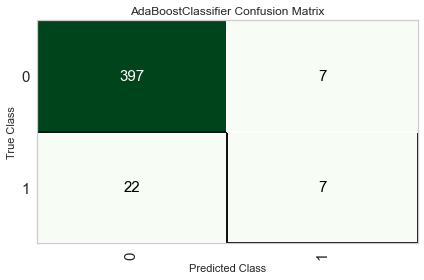

In [10]:
plot_model(clf_model_male_surprise, plot='confusion_matrix')

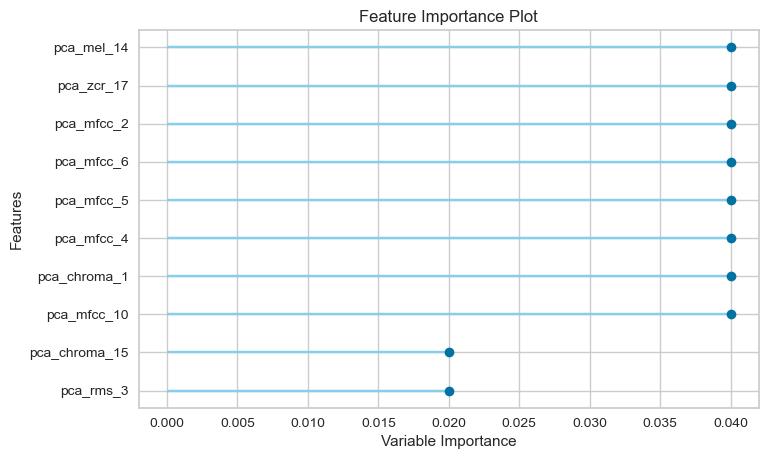

In [11]:
plot_model(clf_model_male_surprise, plot = 'feature')

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

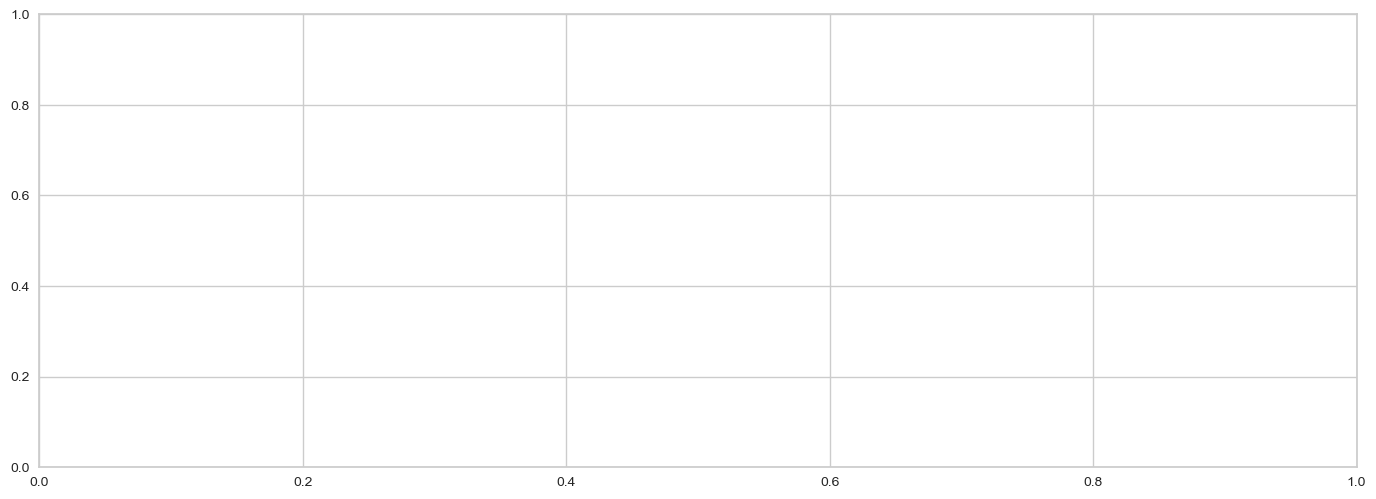

In [12]:
evaluate_model(clf_model_male_surprise)

In [13]:
## NOW WE ARE CREATING A TRAIN AND TEST SPLIT 

setup(data = df_male_surprise, target = 'male_surprise', train_size = 0.7)

,Description,Value
0,Session id,7753
1,Target,male_surprise
2,Target type,Binary
3,Original data shape,"(1440, 119)"
4,Transformed data shape,"(1440, 119)"
5,Transformed train set shape,"(1007, 119)"
6,Transformed test set shape,"(433, 119)"
7,Numeric features,117
8,Categorical features,1
9,Preprocess,True


In [14]:
## TESTING THE MODEL 

clf_predict = predict_model(clf_model_male_surprise)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Ada Boost Classifier,0.9838,0.9768,0.7931,0.9583,0.8679,0.8594,0.8638


In [15]:
## SAVING THE MODEL 
save_model(clf_model_male_surprise, model_name = "best-model-male-surprise")

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=FastMemory(location=C:\Users\Pankil\AppData\Local\Temp\joblib),
          steps=[('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['pca_mfcc_1', 'pca_mfcc_2',
                                              'pca_mfcc_3', 'pca_mfcc_4',
                                              'pca_mfcc_5', 'pca_mfcc_6',
                                              'pca_mfcc_7', 'pca_mfcc_8',
                                              'pca_mfcc_9', 'pca_mfcc_10',
                                              'pca_mfcc_11', 'pca_mfcc_12',
                                              'pca_mfcc_13', 'pca_mfcc_14',
                                              'pca_mfcc_15', '...
                  TransformerWrapper(exclude=None, include=['Audio_name'],
                                     transformer=LeaveOneOutEncoder(cols=['Audio_name'],
                                                                    drop_inv

In [16]:
loaded_bestmodel_male_surprise = load_model('best-model-male-surprise')
print(loaded_bestmodel_male_surprise)

Transformation Pipeline and Model Successfully Loaded
Pipeline(memory=FastMemory(location=C:\Users\Pankil\AppData\Local\Temp\joblib),
         steps=[('numerical_imputer',
                 TransformerWrapper(exclude=None,
                                    include=['pca_mfcc_1', 'pca_mfcc_2',
                                             'pca_mfcc_3', 'pca_mfcc_4',
                                             'pca_mfcc_5', 'pca_mfcc_6',
                                             'pca_mfcc_7', 'pca_mfcc_8',
                                             'pca_mfcc_9', 'pca_mfcc_10',
                                             'pca_mfcc_11', 'pca_mfcc_12',
                                             'pca_mfcc_13', 'pca_mfcc_14',
                                             'pca_mfcc_15', '...
                 TransformerWrapper(exclude=None, include=['Audio_name'],
                                    transformer=LeaveOneOutEncoder(cols=['Audio_name'],
                                   

In [17]:
from sklearn import set_config
set_config(display = "diagram")
loaded_bestmodel_male_surprise[0]

TransformerWrapper(exclude=None,
                   include=['pca_mfcc_1', 'pca_mfcc_2', 'pca_mfcc_3',
                            'pca_mfcc_4', 'pca_mfcc_5', 'pca_mfcc_6',
                            'pca_mfcc_7', 'pca_mfcc_8', 'pca_mfcc_9',
                            'pca_mfcc_10', 'pca_mfcc_11', 'pca_mfcc_12',
                            'pca_mfcc_13', 'pca_mfcc_14', 'pca_mfcc_15',
                            'pca_mfcc_16', 'pca_mfcc_17', 'pca_mfcc_18',
                            'pca_mfcc_19', 'pca_mfcc_20', 'pca_zcr_1',
                            'pca_zcr_2', 'pca_zcr_3', 'pca_zcr_4', 'pca_zcr_5',
                            'pca_zcr_6', 'pca_zcr_7', 'pca_zcr_8', 'pca_zcr_9',
                            'pca_zcr_10', ...],
                   transformer=SimpleImputer(add_indicator=False, copy=True,
                                             fill_value=None,
                                             missing_values=nan,
                                             strategy='mean', verbose=0))

## MODEL CREATION FOR FEMALE SAD 

In [18]:
df_female_sad = pd.read_csv("labels_oneHot_encoding.csv")

In [19]:
df_female_sad.head()

,Unnamed: 0,pca_mfcc_1,pca_mfcc_2,pca_mfcc_3,pca_mfcc_4,pca_mfcc_5,pca_mfcc_6,pca_mfcc_7,pca_mfcc_8,pca_mfcc_9,...,female_neutral,female_sad,female_surprise,male_angry,male_disgust,male_fear,male_happy,male_neutral,male_sad,male_surprise
0,0,-109.834097,0.053196,-1.713443,-3.768810,-12.706864,1.144180,-6.869531,2.593850,-1.156389,...,0,0,0,0,0,0,0,1,0,0
1,1,-105.048512,1.461942,-1.111467,-1.051186,-12.977316,0.638045,-7.102971,1.234032,-0.479727,...,0,0,0,0,0,0,0,1,0,0
2,2,-103.732876,1.979006,-0.234491,-3.120535,-11.674955,-2.359368,-4.729244,2.976227,-0.869942,...,0,0,0,0,0,0,0,1,0,0
3,3,-97.492362,3.365092,-3.041923,-4.759261,-11.648275,-1.808196,-4.129106,2.605237,-0.737542,...,0,0,0,0,0,0,0,1,0,0
4,4,-140.114314,2.689681,1.560070,-2.531609,-10.692509,-1.370026,-4.236870,3.824275,-1.028487,...,0,0,0,0,0,0,0,1,0,0


In [20]:
df_female_sad = df_female_sad.drop(columns = ["Unnamed: 0" , "angry" , "disgust" , "fear" , "happy" , "neutral" , "sad" , "surprise" , "gender" ,"female_disgust" , "female_fear" , "female_happy" , "female_neutral" , "female_angry" , "female_surprise",  "male_angry" ,"male_disgust" , "male_fear" , "male_happy" , "male_neutral" , "male_sad" , "male_surprise" , "path"] , axis = 1)

In [21]:
df_female_sad.head()

,pca_mfcc_1,pca_mfcc_2,pca_mfcc_3,pca_mfcc_4,pca_mfcc_5,pca_mfcc_6,pca_mfcc_7,pca_mfcc_8,pca_mfcc_9,pca_mfcc_10,...,pca_mel_12,pca_mel_13,pca_mel_14,pca_mel_15,pca_mel_16,pca_mel_17,pca_mel_18,pca_mel_19,pca_mel_20,female_sad
0,-109.834097,0.053196,-1.713443,-3.768810,-12.706864,1.144180,-6.869531,2.593850,-1.156389,-1.082873,...,-12.453682,-6.254424,-5.244198,-3.020359,-9.067628,-10.647145,-3.032349,3.813296,7.941038,0
1,-105.048512,1.461942,-1.111467,-1.051186,-12.977316,0.638045,-7.102971,1.234032,-0.479727,-2.553631,...,-12.452970,-6.266163,-5.224034,-3.035165,-9.063099,-10.686008,-3.056054,3.814217,7.981975,0
2,-103.732876,1.979006,-0.234491,-3.120535,-11.674955,-2.359368,-4.729244,2.976227,-0.869942,-2.645149,...,-12.400792,-6.201859,-4.932682,-3.051120,-9.003797,-10.594508,-2.948012,3.825954,7.939555,0
3,-97.492362,3.365092,-3.041923,-4.759261,-11.648275,-1.808196,-4.129106,2.605237,-0.737542,-2.380594,...,-12.388350,-6.240878,-5.088265,-3.072477,-9.064833,-10.652129,-3.076305,3.825014,7.970841,0
4,-140.114314,2.689681,1.560070,-2.531609,-10.692509,-1.370026,-4.236870,3.824275,-1.028487,-1.048890,...,-12.481865,-6.251930,-5.254000,-3.022376,-9.094775,-10.720101,-3.061291,3.846036,8.028451,0


In [22]:
df_female_sad['female_sad'].value_counts()

0    1344
1      96
Name: female_sad, dtype: int64

In [23]:
from pycaret.classification import *
clf = setup(data = df_female_sad, target = 'female_sad')

,Description,Value
0,Session id,7770
1,Target,female_sad
2,Target type,Binary
3,Original data shape,"(1440, 119)"
4,Transformed data shape,"(1440, 119)"
5,Transformed train set shape,"(1007, 119)"
6,Transformed test set shape,"(433, 119)"
7,Numeric features,117
8,Categorical features,1
9,Preprocess,True


In [24]:
## COMAPRING MODELs

## TRAINING 

best = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
knn,K Neighbors Classifier,0.9454,0.8383,0.1929,0.7500,0.3005,0.2873,0.3630,5.3970
xgboost,Extreme Gradient Boosting,0.9414,0.9013,0.1619,0.5000,0.2433,0.2299,0.2706,6.4220
lightgbm,Light Gradient Boosting Machine,0.9385,0.9049,0.0905,0.5000,0.1516,0.1429,0.2022,6.0350
gbc,Gradient Boosting Classifier,0.9375,0.8690,0.1071,0.4167,0.1658,0.1549,0.1957,7.2060
rf,Random Forest Classifier,0.9335,0.8168,0.0000,0.0000,0.0000,0.0000,0.0000,6.5960
qda,Quadratic Discriminant Analysis,0.9335,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000,6.2300
et,Extra Trees Classifier,0.9335,0.8613,0.0000,0.0000,0.0000,0.0000,0.0000,7.3240
dummy,Dummy Classifier,0.9335,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000,5.6300
ada,Ada Boost Classifier,0.9305,0.8702,0.3167,0.5245,0.3866,0.3517,0.3688,6.1120
ridge,Ridge Classifier,0.9265,0.0000,0.0143,0.0500,0.0222,0.0088,0.0103,6.3450


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

In [25]:
print(best)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=5, p=2,
                     weights='uniform')


In [26]:
## NOW WE ARE CREATING THE MODEL 
clf_model_female_sad = create_model('knn')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9505,0.7416,0.2857,1.0000,0.4444,0.4268,0.5208
1,0.9406,0.9081,0.1429,1.0000,0.2500,0.2368,0.3665
2,0.9505,0.7926,0.2857,1.0000,0.4444,0.4268,0.5208
3,0.9505,0.8047,0.2857,1.0000,0.4444,0.4268,0.5208
4,0.9604,0.8989,0.4286,1.0000,0.6000,0.5826,0.6412
5,0.9307,0.8131,0.0000,0.0000,0.0000,0.0000,0.0000
6,0.9307,0.8891,0.0000,0.0000,0.0000,0.0000,0.0000
7,0.9500,0.8670,0.1667,1.0000,0.2857,0.2733,0.3978
8,0.9500,0.8067,0.1667,1.0000,0.2857,0.2733,0.3978


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

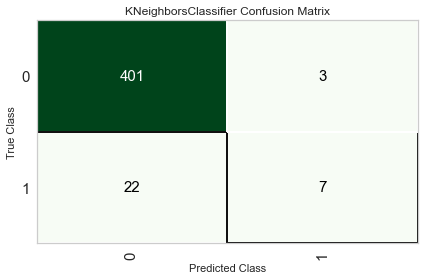

In [27]:
plot_model(clf_model_female_sad, plot='confusion_matrix')

In [32]:
## NOW WE ARE CREATING A TRAIN AND TEST SPLIT 

setup(data = df_female_sad, target = 'female_sad', train_size = 0.7)

,Description,Value
0,Session id,5051
1,Target,female_sad
2,Target type,Binary
3,Original data shape,"(1440, 119)"
4,Transformed data shape,"(1440, 119)"
5,Transformed train set shape,"(1007, 119)"
6,Transformed test set shape,"(433, 119)"
7,Numeric features,117
8,Categorical features,1
9,Preprocess,True


In [33]:
## TESTING THE MODEL 

clf_predict = predict_model(clf_model_female_sad)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,K Neighbors Classifier,0.9607,0.9269,0.4483,0.9286,0.6047,0.5866,0.6300


In [34]:
## SAVING THE MODEL 
save_model(clf_model_female_sad, model_name = "best-model-female-sad")

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=FastMemory(location=C:\Users\Pankil\AppData\Local\Temp\joblib),
          steps=[('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['pca_mfcc_1', 'pca_mfcc_2',
                                              'pca_mfcc_3', 'pca_mfcc_4',
                                              'pca_mfcc_5', 'pca_mfcc_6',
                                              'pca_mfcc_7', 'pca_mfcc_8',
                                              'pca_mfcc_9', 'pca_mfcc_10',
                                              'pca_mfcc_11', 'pca_mfcc_12',
                                              'pca_mfcc_13', 'pca_mfcc_14',
                                              'pca_mfcc_15', '...
                  TransformerWrapper(exclude=None, include=['Audio_name'],
                                     transformer=LeaveOneOutEncoder(cols=['Audio_name'],
                                                                    drop_inv

In [35]:
loaded_bestmodel_female_sad = load_model('best-model-female-sad')
print(loaded_bestmodel_female_sad)

Transformation Pipeline and Model Successfully Loaded
Pipeline(memory=FastMemory(location=C:\Users\Pankil\AppData\Local\Temp\joblib),
         steps=[('numerical_imputer',
                 TransformerWrapper(exclude=None,
                                    include=['pca_mfcc_1', 'pca_mfcc_2',
                                             'pca_mfcc_3', 'pca_mfcc_4',
                                             'pca_mfcc_5', 'pca_mfcc_6',
                                             'pca_mfcc_7', 'pca_mfcc_8',
                                             'pca_mfcc_9', 'pca_mfcc_10',
                                             'pca_mfcc_11', 'pca_mfcc_12',
                                             'pca_mfcc_13', 'pca_mfcc_14',
                                             'pca_mfcc_15', '...
                 TransformerWrapper(exclude=None, include=['Audio_name'],
                                    transformer=LeaveOneOutEncoder(cols=['Audio_name'],
                                   

In [36]:
from sklearn import set_config
set_config(display = "diagram")
loaded_bestmodel_female_sad[0]

TransformerWrapper(exclude=None,
                   include=['pca_mfcc_1', 'pca_mfcc_2', 'pca_mfcc_3',
                            'pca_mfcc_4', 'pca_mfcc_5', 'pca_mfcc_6',
                            'pca_mfcc_7', 'pca_mfcc_8', 'pca_mfcc_9',
                            'pca_mfcc_10', 'pca_mfcc_11', 'pca_mfcc_12',
                            'pca_mfcc_13', 'pca_mfcc_14', 'pca_mfcc_15',
                            'pca_mfcc_16', 'pca_mfcc_17', 'pca_mfcc_18',
                            'pca_mfcc_19', 'pca_mfcc_20', 'pca_zcr_1',
                            'pca_zcr_2', 'pca_zcr_3', 'pca_zcr_4', 'pca_zcr_5',
                            'pca_zcr_6', 'pca_zcr_7', 'pca_zcr_8', 'pca_zcr_9',
                            'pca_zcr_10', ...],
                   transformer=SimpleImputer(add_indicator=False, copy=True,
                                             fill_value=None,
                                             missing_values=nan,
                                             strategy='mean', verbose=0))

## MODEL CREATION FOR FEMALE NEUTRAL

In [37]:
df_female_neutral = pd.read_csv("labels_oneHot_encoding.csv")

In [38]:
df_female_neutral.head()

,Unnamed: 0,pca_mfcc_1,pca_mfcc_2,pca_mfcc_3,pca_mfcc_4,pca_mfcc_5,pca_mfcc_6,pca_mfcc_7,pca_mfcc_8,pca_mfcc_9,...,female_neutral,female_sad,female_surprise,male_angry,male_disgust,male_fear,male_happy,male_neutral,male_sad,male_surprise
0,0,-109.834097,0.053196,-1.713443,-3.768810,-12.706864,1.144180,-6.869531,2.593850,-1.156389,...,0,0,0,0,0,0,0,1,0,0
1,1,-105.048512,1.461942,-1.111467,-1.051186,-12.977316,0.638045,-7.102971,1.234032,-0.479727,...,0,0,0,0,0,0,0,1,0,0
2,2,-103.732876,1.979006,-0.234491,-3.120535,-11.674955,-2.359368,-4.729244,2.976227,-0.869942,...,0,0,0,0,0,0,0,1,0,0
3,3,-97.492362,3.365092,-3.041923,-4.759261,-11.648275,-1.808196,-4.129106,2.605237,-0.737542,...,0,0,0,0,0,0,0,1,0,0
4,4,-140.114314,2.689681,1.560070,-2.531609,-10.692509,-1.370026,-4.236870,3.824275,-1.028487,...,0,0,0,0,0,0,0,1,0,0


In [39]:
df_female_neutral = df_female_neutral.drop(columns = ["Unnamed: 0" , "angry" , "disgust" , "fear" , "happy" , "neutral" , "sad" , "surprise" , "gender" ,"female_disgust" , "female_fear" , "female_happy" , "female_angry" , "female_sad" , "female_surprise",  "male_angry" ,"male_disgust" , "male_fear" , "male_happy" , "male_neutral" , "male_sad" , "male_surprise" , "path"] , axis = 1)

In [40]:
df_female_neutral.head()

,pca_mfcc_1,pca_mfcc_2,pca_mfcc_3,pca_mfcc_4,pca_mfcc_5,pca_mfcc_6,pca_mfcc_7,pca_mfcc_8,pca_mfcc_9,pca_mfcc_10,...,pca_mel_12,pca_mel_13,pca_mel_14,pca_mel_15,pca_mel_16,pca_mel_17,pca_mel_18,pca_mel_19,pca_mel_20,female_neutral
0,-109.834097,0.053196,-1.713443,-3.768810,-12.706864,1.144180,-6.869531,2.593850,-1.156389,-1.082873,...,-12.453682,-6.254424,-5.244198,-3.020359,-9.067628,-10.647145,-3.032349,3.813296,7.941038,0
1,-105.048512,1.461942,-1.111467,-1.051186,-12.977316,0.638045,-7.102971,1.234032,-0.479727,-2.553631,...,-12.452970,-6.266163,-5.224034,-3.035165,-9.063099,-10.686008,-3.056054,3.814217,7.981975,0
2,-103.732876,1.979006,-0.234491,-3.120535,-11.674955,-2.359368,-4.729244,2.976227,-0.869942,-2.645149,...,-12.400792,-6.201859,-4.932682,-3.051120,-9.003797,-10.594508,-2.948012,3.825954,7.939555,0
3,-97.492362,3.365092,-3.041923,-4.759261,-11.648275,-1.808196,-4.129106,2.605237,-0.737542,-2.380594,...,-12.388350,-6.240878,-5.088265,-3.072477,-9.064833,-10.652129,-3.076305,3.825014,7.970841,0
4,-140.114314,2.689681,1.560070,-2.531609,-10.692509,-1.370026,-4.236870,3.824275,-1.028487,-1.048890,...,-12.481865,-6.251930,-5.254000,-3.022376,-9.094775,-10.720101,-3.061291,3.846036,8.028451,0


In [42]:
df_female_neutral['female_neutral'].value_counts()

0    1296
1     144
Name: female_neutral, dtype: int64

In [43]:
from pycaret.classification import *
clf = setup(data = df_female_neutral, target = 'female_neutral')

,Description,Value
0,Session id,3847
1,Target,female_neutral
2,Target type,Binary
3,Original data shape,"(1440, 119)"
4,Transformed data shape,"(1440, 119)"
5,Transformed train set shape,"(1007, 119)"
6,Transformed test set shape,"(433, 119)"
7,Numeric features,117
8,Categorical features,1
9,Preprocess,True


In [44]:
## COMAPRING MODELs

## TRAINING 

best = compare_models() 

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
xgboost,Extreme Gradient Boosting,0.9564,0.9730,0.7036,0.8603,0.7601,0.7369,0.7488,6.1310
knn,K Neighbors Classifier,0.9534,0.9637,0.8127,0.7580,0.7802,0.7544,0.7575,5.6980
lightgbm,Light Gradient Boosting Machine,0.9465,0.9694,0.6182,0.8144,0.6919,0.6639,0.6770,6.1330
ada,Ada Boost Classifier,0.9405,0.9464,0.6145,0.7780,0.6693,0.6380,0.6518,5.9960
gbc,Gradient Boosting Classifier,0.9405,0.9629,0.5445,0.8241,0.6380,0.6083,0.6311,7.4830
lda,Linear Discriminant Analysis,0.9395,0.9659,0.8318,0.6804,0.7410,0.7078,0.7168,6.2520
rf,Random Forest Classifier,0.9355,0.9555,0.4273,0.8658,0.5639,0.5343,0.5770,6.0630
ridge,Ridge Classifier,0.9295,0.0000,0.5073,0.7445,0.5835,0.5476,0.5693,5.8000
lr,Logistic Regression,0.9256,0.9538,0.7045,0.6504,0.6610,0.6206,0.6301,6.5950
et,Extra Trees Classifier,0.9236,0.9681,0.2791,0.9067,0.4084,0.3821,0.4623,6.5180


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

In [45]:
print(best)

XGBClassifier(base_score=None, booster='gbtree', callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=-1, num_parallel_tree=None,
              objective='binary:logistic', predictor=None, ...)


In [46]:
## NOW WE ARE CREATING THE MODEL 
clf_model_female_neutral = create_model('xgboost')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9505,0.9703,0.8000,0.7273,0.7619,0.7344,0.7354
1,0.9901,0.9934,0.9000,1.0000,0.9474,0.9419,0.9435
2,0.9406,0.9714,0.4000,1.0000,0.5714,0.5457,0.6126
3,0.9307,0.9890,0.5000,0.7143,0.5882,0.5517,0.5622
4,0.9604,0.9011,0.6000,1.0000,0.7500,0.7299,0.7581
5,0.9604,0.9681,0.8000,0.8000,0.8000,0.7780,0.7780
6,0.9109,0.9576,0.6364,0.5833,0.6087,0.5585,0.5592
7,0.9700,0.9956,0.8000,0.8889,0.8421,0.8256,0.8270
8,0.9700,0.9878,0.8000,0.8889,0.8421,0.8256,0.8270


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

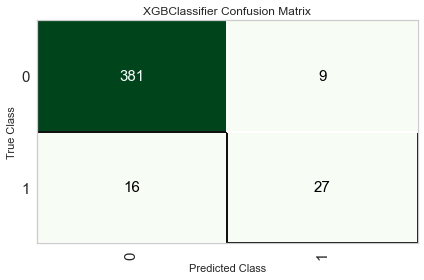

In [47]:
plot_model(clf_model_female_neutral, plot='confusion_matrix')

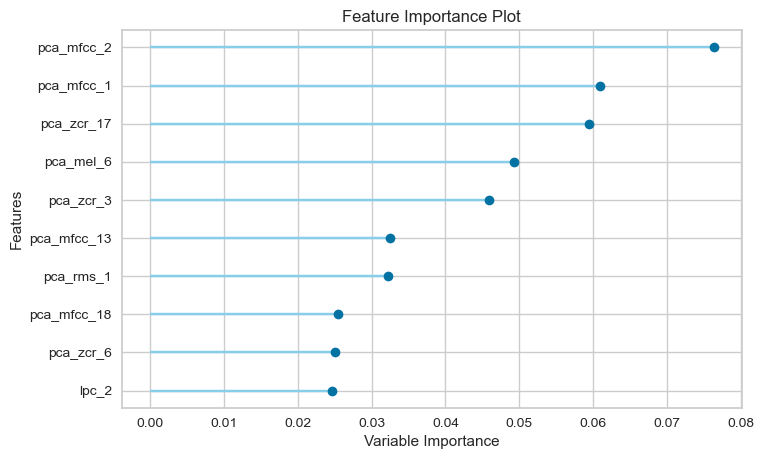

In [48]:
plot_model(clf_model_female_neutral, plot = 'feature')

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

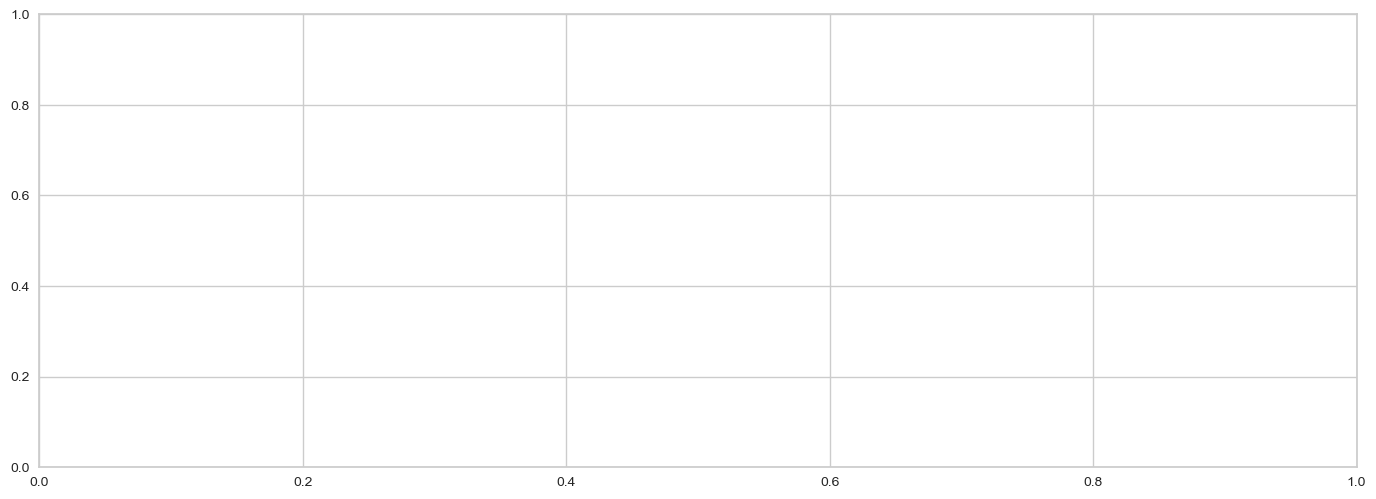

In [49]:
evaluate_model(clf_model_female_neutral)

In [50]:
## NOW WE ARE CREATING A TRAIN AND TEST SPLIT 

setup(data = df_female_neutral, target = 'female_neutral', train_size = 0.7)

,Description,Value
0,Session id,3342
1,Target,female_neutral
2,Target type,Binary
3,Original data shape,"(1440, 119)"
4,Transformed data shape,"(1440, 119)"
5,Transformed train set shape,"(1007, 119)"
6,Transformed test set shape,"(433, 119)"
7,Numeric features,117
8,Categorical features,1
9,Preprocess,True


In [51]:
## TESTING THE MODEL 

clf_predict = predict_model(clf_model_female_neutral)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Extreme Gradient Boosting,0.9746,0.9776,0.8140,0.9211,0.8642,0.8502,0.8522


In [52]:
## SAVING THE MODEL 
save_model(clf_model_female_neutral, model_name = "best-model-female-neutral")

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=FastMemory(location=C:\Users\Pankil\AppData\Local\Temp\joblib),
          steps=[('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['pca_mfcc_1', 'pca_mfcc_2',
                                              'pca_mfcc_3', 'pca_mfcc_4',
                                              'pca_mfcc_5', 'pca_mfcc_6',
                                              'pca_mfcc_7', 'pca_mfcc_8',
                                              'pca_mfcc_9', 'pca_mfcc_10',
                                              'pca_mfcc_11', 'pca_mfcc_12',
                                              'pca_mfcc_13', 'pca_mfcc_14',
                                              'pca_mfcc_15', '...
                                grow_policy=None, importance_type=None,
                                interaction_constraints=None, learning_rate=None,
                                max_bin=None, max_cat_threshold=None,
                

In [53]:
loaded_bestmodel_female_neutral = load_model('best-model-female-neutral')
print(loaded_bestmodel_female_neutral)

Transformation Pipeline and Model Successfully Loaded
Pipeline(memory=FastMemory(location=C:\Users\Pankil\AppData\Local\Temp\joblib),
         steps=[('numerical_imputer',
                 TransformerWrapper(exclude=None,
                                    include=['pca_mfcc_1', 'pca_mfcc_2',
                                             'pca_mfcc_3', 'pca_mfcc_4',
                                             'pca_mfcc_5', 'pca_mfcc_6',
                                             'pca_mfcc_7', 'pca_mfcc_8',
                                             'pca_mfcc_9', 'pca_mfcc_10',
                                             'pca_mfcc_11', 'pca_mfcc_12',
                                             'pca_mfcc_13', 'pca_mfcc_14',
                                             'pca_mfcc_15', '...
                               grow_policy=None, importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, 

In [54]:
from sklearn import set_config
set_config(display = "diagram")
loaded_bestmodel_female_neutral[0]

TransformerWrapper(exclude=None,
                   include=['pca_mfcc_1', 'pca_mfcc_2', 'pca_mfcc_3',
                            'pca_mfcc_4', 'pca_mfcc_5', 'pca_mfcc_6',
                            'pca_mfcc_7', 'pca_mfcc_8', 'pca_mfcc_9',
                            'pca_mfcc_10', 'pca_mfcc_11', 'pca_mfcc_12',
                            'pca_mfcc_13', 'pca_mfcc_14', 'pca_mfcc_15',
                            'pca_mfcc_16', 'pca_mfcc_17', 'pca_mfcc_18',
                            'pca_mfcc_19', 'pca_mfcc_20', 'pca_zcr_1',
                            'pca_zcr_2', 'pca_zcr_3', 'pca_zcr_4', 'pca_zcr_5',
                            'pca_zcr_6', 'pca_zcr_7', 'pca_zcr_8', 'pca_zcr_9',
                            'pca_zcr_10', ...],
                   transformer=SimpleImputer(add_indicator=False, copy=True,
                                             fill_value=None,
                                             missing_values=nan,
                                             strategy='mean', verbose=0))

## MODEL CREATION FOR FEMALE SURPRISE

In [55]:
df_female_surprise = pd.read_csv("labels_oneHot_encoding.csv")

In [56]:
df_female_surprise.head()

,Unnamed: 0,pca_mfcc_1,pca_mfcc_2,pca_mfcc_3,pca_mfcc_4,pca_mfcc_5,pca_mfcc_6,pca_mfcc_7,pca_mfcc_8,pca_mfcc_9,...,female_neutral,female_sad,female_surprise,male_angry,male_disgust,male_fear,male_happy,male_neutral,male_sad,male_surprise
0,0,-109.834097,0.053196,-1.713443,-3.768810,-12.706864,1.144180,-6.869531,2.593850,-1.156389,...,0,0,0,0,0,0,0,1,0,0
1,1,-105.048512,1.461942,-1.111467,-1.051186,-12.977316,0.638045,-7.102971,1.234032,-0.479727,...,0,0,0,0,0,0,0,1,0,0
2,2,-103.732876,1.979006,-0.234491,-3.120535,-11.674955,-2.359368,-4.729244,2.976227,-0.869942,...,0,0,0,0,0,0,0,1,0,0
3,3,-97.492362,3.365092,-3.041923,-4.759261,-11.648275,-1.808196,-4.129106,2.605237,-0.737542,...,0,0,0,0,0,0,0,1,0,0
4,4,-140.114314,2.689681,1.560070,-2.531609,-10.692509,-1.370026,-4.236870,3.824275,-1.028487,...,0,0,0,0,0,0,0,1,0,0


In [58]:
df_female_surprise = df_female_surprise.drop(columns = ["Unnamed: 0" , "angry" , "disgust" , "fear" , "happy" , "neutral" , "sad" , "surprise" , "gender" ,"female_disgust" , "female_fear" , "female_happy" , "female_neutral" , "female_sad" , "female_angry",  "male_angry" ,"male_disgust" , "male_fear" , "male_happy" , "male_neutral" , "male_sad" , "male_surprise" , "path"] , axis = 1)

In [59]:
df_female_surprise.head()

,pca_mfcc_1,pca_mfcc_2,pca_mfcc_3,pca_mfcc_4,pca_mfcc_5,pca_mfcc_6,pca_mfcc_7,pca_mfcc_8,pca_mfcc_9,pca_mfcc_10,...,pca_mel_12,pca_mel_13,pca_mel_14,pca_mel_15,pca_mel_16,pca_mel_17,pca_mel_18,pca_mel_19,pca_mel_20,female_surprise
0,-109.834097,0.053196,-1.713443,-3.768810,-12.706864,1.144180,-6.869531,2.593850,-1.156389,-1.082873,...,-12.453682,-6.254424,-5.244198,-3.020359,-9.067628,-10.647145,-3.032349,3.813296,7.941038,0
1,-105.048512,1.461942,-1.111467,-1.051186,-12.977316,0.638045,-7.102971,1.234032,-0.479727,-2.553631,...,-12.452970,-6.266163,-5.224034,-3.035165,-9.063099,-10.686008,-3.056054,3.814217,7.981975,0
2,-103.732876,1.979006,-0.234491,-3.120535,-11.674955,-2.359368,-4.729244,2.976227,-0.869942,-2.645149,...,-12.400792,-6.201859,-4.932682,-3.051120,-9.003797,-10.594508,-2.948012,3.825954,7.939555,0
3,-97.492362,3.365092,-3.041923,-4.759261,-11.648275,-1.808196,-4.129106,2.605237,-0.737542,-2.380594,...,-12.388350,-6.240878,-5.088265,-3.072477,-9.064833,-10.652129,-3.076305,3.825014,7.970841,0
4,-140.114314,2.689681,1.560070,-2.531609,-10.692509,-1.370026,-4.236870,3.824275,-1.028487,-1.048890,...,-12.481865,-6.251930,-5.254000,-3.022376,-9.094775,-10.720101,-3.061291,3.846036,8.028451,0


In [60]:
df_female_surprise['female_surprise'].value_counts()

0    1344
1      96
Name: female_surprise, dtype: int64

In [61]:
from pycaret.classification import *
clf = setup(data = df_female_surprise, target = 'female_surprise')

,Description,Value
0,Session id,8033
1,Target,female_surprise
2,Target type,Binary
3,Original data shape,"(1440, 119)"
4,Transformed data shape,"(1440, 119)"
5,Transformed train set shape,"(1007, 119)"
6,Transformed test set shape,"(433, 119)"
7,Numeric features,117
8,Categorical features,1
9,Preprocess,True


In [62]:
## COMAPRING MODELs

## TRAINING 

best = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.9524,0.9564,0.3333,0.8167,0.4645,0.4475,0.5014,5.5090
ada,Ada Boost Classifier,0.9444,0.8934,0.4500,0.6278,0.5124,0.4847,0.4981,5.5070
xgboost,Extreme Gradient Boosting,0.9414,0.9385,0.2119,0.5500,0.2919,0.2751,0.3145,5.4830
gbc,Gradient Boosting Classifier,0.9394,0.9410,0.1810,0.5733,0.2636,0.2469,0.2964,6.2540
rf,Random Forest Classifier,0.9345,0.8796,0.0167,0.1000,0.0286,0.0273,0.0398,5.7110
qda,Quadratic Discriminant Analysis,0.9335,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000,5.7050
et,Extra Trees Classifier,0.9335,0.8933,0.0000,0.0000,0.0000,0.0000,0.0000,5.4800
dummy,Dummy Classifier,0.9335,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000,5.6700
knn,K Neighbors Classifier,0.9295,0.8625,0.2571,0.4771,0.3120,0.2797,0.3048,5.7840
ridge,Ridge Classifier,0.9285,0.0000,0.0000,0.0000,0.0000,-0.0088,-0.0136,5.7120


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

In [63]:
print(best)

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=8033, reg_alpha=0.0, reg_lambda=0.0, silent='warn',
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)


In [64]:
## NOW WE ARE CREATING THE MODEL 
clf_model_female_surprise = create_model('lightgbm')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9505,0.9939,0.2857,1.0000,0.4444,0.4268,0.5208
1,0.9505,0.9498,0.2857,1.0000,0.4444,0.4268,0.5208
2,0.9505,0.9742,0.2857,1.0000,0.4444,0.4268,0.5208
3,0.9307,0.8252,0.0000,0.0000,0.0000,0.0000,0.0000
4,0.9505,0.9696,0.4286,0.7500,0.5455,0.5213,0.5443
5,0.9406,0.9514,0.2857,0.6667,0.4000,0.3740,0.4115
6,0.9604,0.9757,0.4286,1.0000,0.6000,0.5826,0.6412
7,0.9700,0.9486,0.5000,1.0000,0.6667,0.6528,0.6961
8,0.9600,0.9911,0.5000,0.7500,0.6000,0.5798,0.5931


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

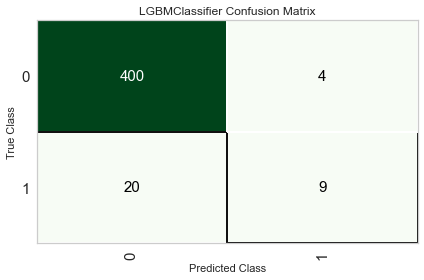

In [65]:
plot_model(clf_model_female_surprise, plot='confusion_matrix')

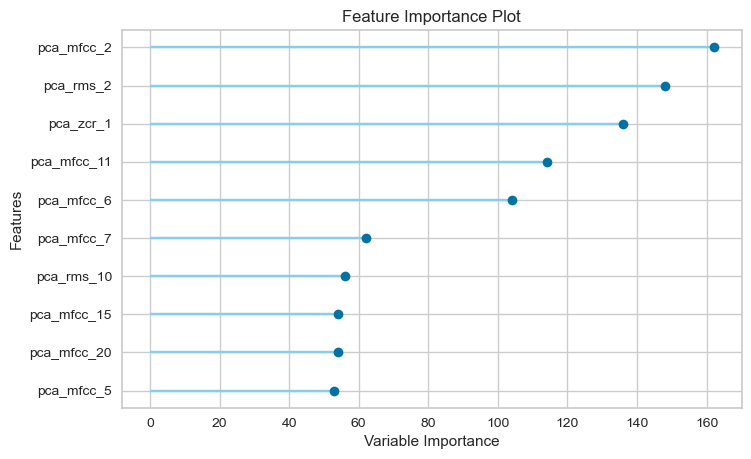

In [66]:
plot_model(clf_model_female_surprise, plot = 'feature')

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

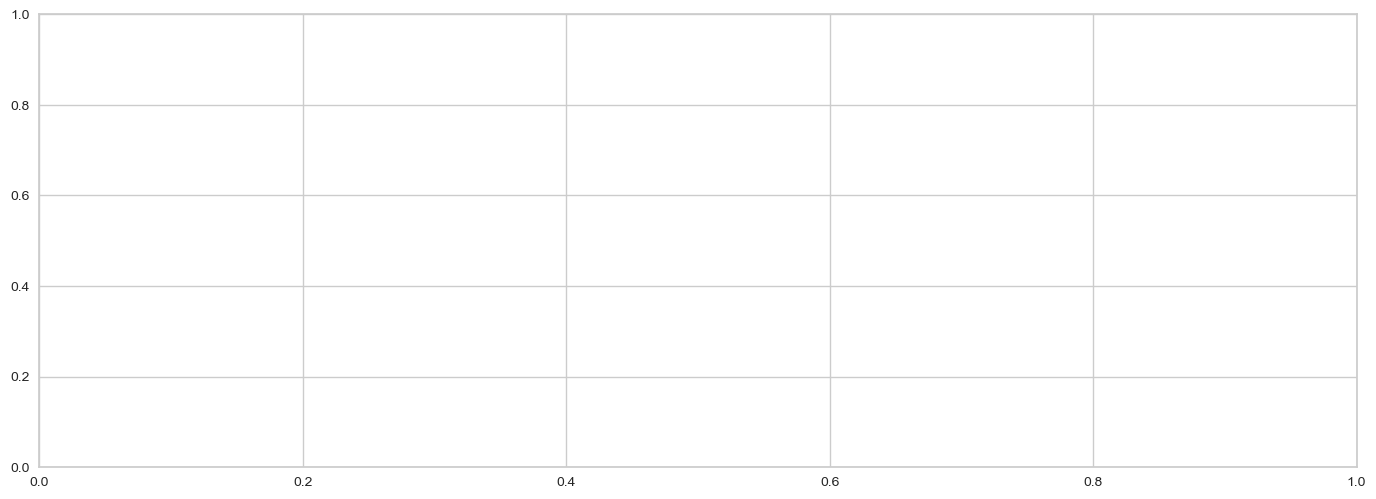

In [67]:
evaluate_model(clf_model_female_surprise)

In [68]:
## NOW WE ARE CREATING A TRAIN AND TEST SPLIT 

setup(data = df_female_surprise, target = 'female_surprise', train_size = 0.7)

,Description,Value
0,Session id,5800
1,Target,female_surprise
2,Target type,Binary
3,Original data shape,"(1440, 119)"
4,Transformed data shape,"(1440, 119)"
5,Transformed train set shape,"(1007, 119)"
6,Transformed test set shape,"(433, 119)"
7,Numeric features,117
8,Categorical features,1
9,Preprocess,True


In [69]:
## TESTING THE MODEL 

clf_predict = predict_model(clf_model_female_surprise)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Light Gradient Boosting Machine,0.9792,0.9915,0.7586,0.9167,0.8302,0.8192,0.8234


In [70]:
## SAVING THE MODEL 
save_model(clf_model_female_surprise, model_name = "best-model-female-surprise")

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=FastMemory(location=C:\Users\Pankil\AppData\Local\Temp\joblib),
          steps=[('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['pca_mfcc_1', 'pca_mfcc_2',
                                              'pca_mfcc_3', 'pca_mfcc_4',
                                              'pca_mfcc_5', 'pca_mfcc_6',
                                              'pca_mfcc_7', 'pca_mfcc_8',
                                              'pca_mfcc_9', 'pca_mfcc_10',
                                              'pca_mfcc_11', 'pca_mfcc_12',
                                              'pca_mfcc_13', 'pca_mfcc_14',
                                              'pca_mfcc_15', '...
                  LGBMClassifier(boosting_type='gbdt', class_weight=None,
                                 colsample_bytree=1.0, importance_type='split',
                                 learning_rate=0.1, max_depth=-1,
                    

In [71]:
loaded_bestmodel_female_surprise = load_model('best-model-female-surprise')
print(loaded_bestmodel_female_surprise)

Transformation Pipeline and Model Successfully Loaded
Pipeline(memory=FastMemory(location=C:\Users\Pankil\AppData\Local\Temp\joblib),
         steps=[('numerical_imputer',
                 TransformerWrapper(exclude=None,
                                    include=['pca_mfcc_1', 'pca_mfcc_2',
                                             'pca_mfcc_3', 'pca_mfcc_4',
                                             'pca_mfcc_5', 'pca_mfcc_6',
                                             'pca_mfcc_7', 'pca_mfcc_8',
                                             'pca_mfcc_9', 'pca_mfcc_10',
                                             'pca_mfcc_11', 'pca_mfcc_12',
                                             'pca_mfcc_13', 'pca_mfcc_14',
                                             'pca_mfcc_15', '...
                 LGBMClassifier(boosting_type='gbdt', class_weight=None,
                                colsample_bytree=1.0, importance_type='split',
                                learning_rate

In [72]:
from sklearn import set_config
set_config(display = "diagram")
loaded_bestmodel_female_surprise[0]

TransformerWrapper(exclude=None,
                   include=['pca_mfcc_1', 'pca_mfcc_2', 'pca_mfcc_3',
                            'pca_mfcc_4', 'pca_mfcc_5', 'pca_mfcc_6',
                            'pca_mfcc_7', 'pca_mfcc_8', 'pca_mfcc_9',
                            'pca_mfcc_10', 'pca_mfcc_11', 'pca_mfcc_12',
                            'pca_mfcc_13', 'pca_mfcc_14', 'pca_mfcc_15',
                            'pca_mfcc_16', 'pca_mfcc_17', 'pca_mfcc_18',
                            'pca_mfcc_19', 'pca_mfcc_20', 'pca_zcr_1',
                            'pca_zcr_2', 'pca_zcr_3', 'pca_zcr_4', 'pca_zcr_5',
                            'pca_zcr_6', 'pca_zcr_7', 'pca_zcr_8', 'pca_zcr_9',
                            'pca_zcr_10', ...],
                   transformer=SimpleImputer(add_indicator=False, copy=True,
                                             fill_value=None,
                                             missing_values=nan,
                                             strategy='mean', verbose=0))